In [1]:
from preprocessing_last20 import *
import torch.optim as optim
from tqdm import tqdm
from mindiffusion.ddpm import DDPM
from mindiffusion.unet import NaiveUnet
device = torch.device('cuda:2')
train_data = train_data.to(device)

In [2]:
ddpm = DDPM(eps_model=NaiveUnet(1, 1, n_feat=128), betas=(1e-4, 0.02), n_T=200)
ddpm.to(device)

DDPM(
  (eps_model): NaiveUnet(
    (init_conv): Conv3(
      (main): Sequential(
        (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): GroupNorm(8, 128, eps=1e-05, affine=True)
        (2): ReLU()
      )
      (conv): Sequential(
        (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): GroupNorm(8, 128, eps=1e-05, affine=True)
        (2): ReLU()
        (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): GroupNorm(8, 128, eps=1e-05, affine=True)
        (5): ReLU()
      )
    )
    (down1): UnetDown(
      (model): Sequential(
        (0): Conv3(
          (main): Sequential(
            (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): GroupNorm(8, 128, eps=1e-05, affine=True)
            (2): ReLU()
          )
          (conv): Sequential(
            (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
         

In [3]:
train_data = train_data.reshape(200, 1, 1, 64, 64)

In [4]:
ddpm.load_state_dict(torch.load("ddpm_batched_200_last20.pth"))

<All keys matched successfully>

In [7]:
def train_1_ep_ddpm(num_epoch, optim):

    print(f"Epoch {num_epoch} : ")
    ddpm.train()

    loss_ema = None
    

    train_data_tmp = train_data[torch.randperm(train_data.size()[0])]
    train_data_tmp = train_data_tmp.reshape(50, 4, 1, 64, 64)
    
    for i in tqdm(range(train_data_tmp.shape[0])):
        optim.zero_grad()
        loss = ddpm(train_data_tmp[i])
        loss.backward()
        if loss_ema is None:
            loss_ema = loss.item()
        else:
            loss_ema = 0.9 * loss_ema + 0.1 * loss.item()
        optim.step()
    print('loss',loss_ema)
    if num_epoch%20 == 1:
        ddpm.eval()
        with torch.no_grad():
            xh = ddpm.sample(3, (1, 64, 64), device)
            print(xh.shape)
            tensor_to_picture(xh[0].detach().cpu().numpy()[0])
            tensor_to_picture(xh[1].detach().cpu().numpy()[0])
            tensor_to_picture(xh[2].detach().cpu().numpy()[0])

    # save model
    torch.save(ddpm.state_dict(), f"./ddpm_batched_200_last20.pth")

In [8]:
def train_ddpm(epoch, lr, lr_decay, reg):
    for i in range(epoch):
        
        optim = torch.optim.SGD(ddpm.parameters(), lr=lr*lr_decay**i, momentum=0.9, weight_decay=reg)
        train_1_ep_ddpm(i, optim)

Epoch 0 : 


100%|██████████| 50/50 [00:03<00:00, 14.31it/s]


loss 0.18565610688023035
Epoch 1 : 


100%|██████████| 50/50 [00:03<00:00, 13.86it/s]


loss 0.1738345627738107
torch.Size([3, 1, 64, 64])


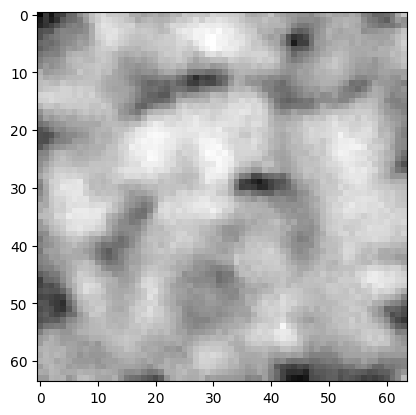

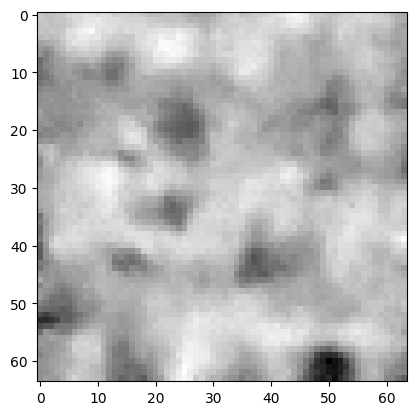

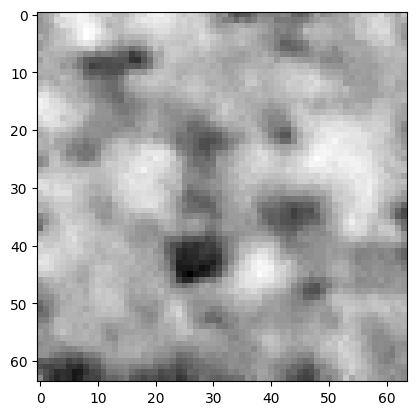

Epoch 2 : 


100%|██████████| 50/50 [00:03<00:00, 13.56it/s]


loss 0.21990591153457895
Epoch 3 : 


100%|██████████| 50/50 [00:03<00:00, 13.30it/s]


loss 0.1798935839364342
Epoch 4 : 


100%|██████████| 50/50 [00:03<00:00, 14.11it/s]


loss 0.1951641120822871
Epoch 5 : 


100%|██████████| 50/50 [00:03<00:00, 13.80it/s]


loss 0.15547810279772253
Epoch 6 : 


100%|██████████| 50/50 [00:03<00:00, 13.30it/s]


loss 0.19004993756783634
Epoch 7 : 


100%|██████████| 50/50 [00:03<00:00, 13.64it/s]


loss 0.2099275884564957
Epoch 8 : 


100%|██████████| 50/50 [00:03<00:00, 13.49it/s]


loss 0.18302617446297378
Epoch 9 : 


100%|██████████| 50/50 [00:03<00:00, 13.27it/s]


loss 0.18681330959144352
Epoch 10 : 


100%|██████████| 50/50 [00:03<00:00, 13.17it/s]


loss 0.1678846610017562
Epoch 11 : 


100%|██████████| 50/50 [00:03<00:00, 13.01it/s]


loss 0.1449900770663377
Epoch 12 : 


100%|██████████| 50/50 [00:03<00:00, 13.70it/s]


loss 0.18545990814647303
Epoch 13 : 


100%|██████████| 50/50 [00:03<00:00, 13.15it/s]


loss 0.17858834988038913
Epoch 14 : 


100%|██████████| 50/50 [00:03<00:00, 13.28it/s]


loss 0.17009882824715017
Epoch 15 : 


100%|██████████| 50/50 [00:03<00:00, 13.60it/s]


loss 0.17184755548876848
Epoch 16 : 


100%|██████████| 50/50 [00:03<00:00, 13.82it/s]


loss 0.17440643179309667
Epoch 17 : 


100%|██████████| 50/50 [00:03<00:00, 13.23it/s]


loss 0.1832375032677561
Epoch 18 : 


100%|██████████| 50/50 [00:03<00:00, 13.22it/s]


loss 0.1783284371872125
Epoch 19 : 


100%|██████████| 50/50 [00:03<00:00, 12.67it/s]


loss 0.2071696896147377
Epoch 20 : 


100%|██████████| 50/50 [00:03<00:00, 13.38it/s]


loss 0.18777033731686882
Epoch 21 : 


100%|██████████| 50/50 [00:03<00:00, 13.78it/s]


loss 0.18549581248019387
torch.Size([3, 1, 64, 64])


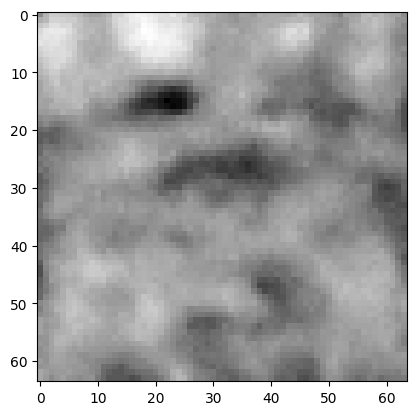

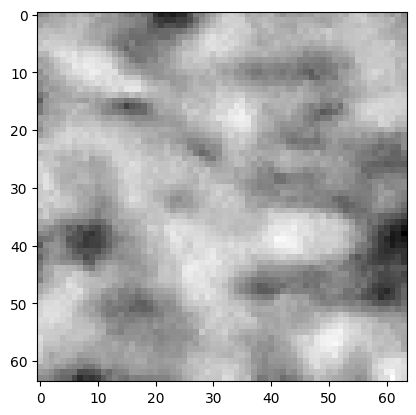

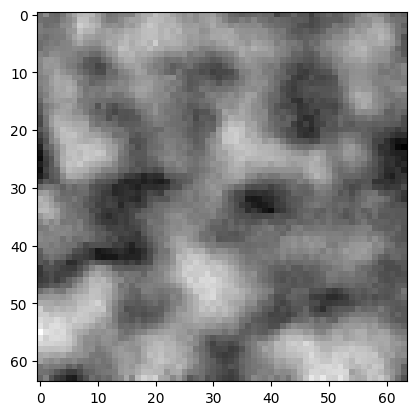

Epoch 22 : 


100%|██████████| 50/50 [00:03<00:00, 13.30it/s]


loss 0.1459287304964328
Epoch 23 : 


100%|██████████| 50/50 [00:03<00:00, 12.94it/s]


loss 0.18110925773370654
Epoch 24 : 


100%|██████████| 50/50 [00:03<00:00, 13.65it/s]


loss 0.16709438233497204
Epoch 25 : 


100%|██████████| 50/50 [00:03<00:00, 13.15it/s]


loss 0.14138566557716784
Epoch 26 : 


100%|██████████| 50/50 [00:03<00:00, 13.14it/s]


loss 0.16027356550766259
Epoch 27 : 


100%|██████████| 50/50 [00:03<00:00, 13.39it/s]


loss 0.1902390101320541
Epoch 28 : 


100%|██████████| 50/50 [00:03<00:00, 12.72it/s]


loss 0.18116759884761918
Epoch 29 : 


100%|██████████| 50/50 [00:03<00:00, 12.82it/s]


loss 0.1700745182310411
Epoch 30 : 


100%|██████████| 50/50 [00:03<00:00, 13.71it/s]


loss 0.1950494825669717
Epoch 31 : 


100%|██████████| 50/50 [00:03<00:00, 13.04it/s]


loss 0.1933257962690545
Epoch 32 : 


100%|██████████| 50/50 [00:03<00:00, 13.43it/s]


loss 0.17219283471376806
Epoch 33 : 


100%|██████████| 50/50 [00:03<00:00, 13.45it/s]


loss 0.1794610744728165
Epoch 34 : 


100%|██████████| 50/50 [00:03<00:00, 13.70it/s]


loss 0.15130583092602884
Epoch 35 : 


100%|██████████| 50/50 [00:03<00:00, 13.24it/s]


loss 0.15081364423376753
Epoch 36 : 


100%|██████████| 50/50 [00:03<00:00, 13.18it/s]


loss 0.16139865640741033
Epoch 37 : 


100%|██████████| 50/50 [00:03<00:00, 13.23it/s]


loss 0.1713783227399184
Epoch 38 : 


100%|██████████| 50/50 [00:03<00:00, 14.01it/s]


loss 0.21340614433690006
Epoch 39 : 


100%|██████████| 50/50 [00:03<00:00, 13.39it/s]


loss 0.18395381963444288
Epoch 40 : 


100%|██████████| 50/50 [00:03<00:00, 13.48it/s]


loss 0.1729061072705966
Epoch 41 : 


100%|██████████| 50/50 [00:03<00:00, 13.07it/s]


loss 0.17320269679780784
torch.Size([3, 1, 64, 64])


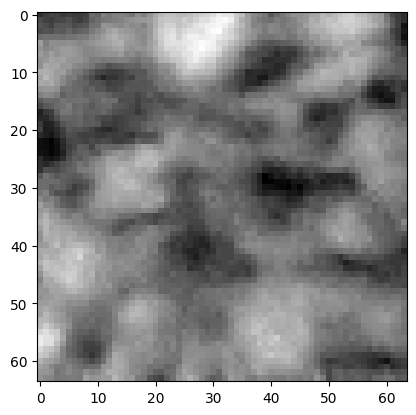

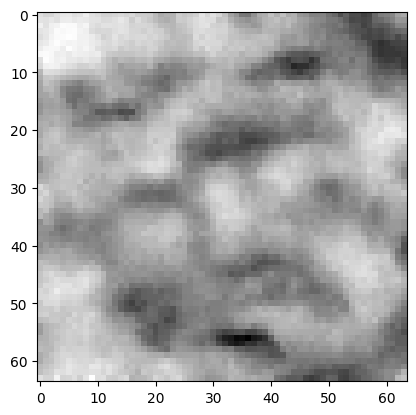

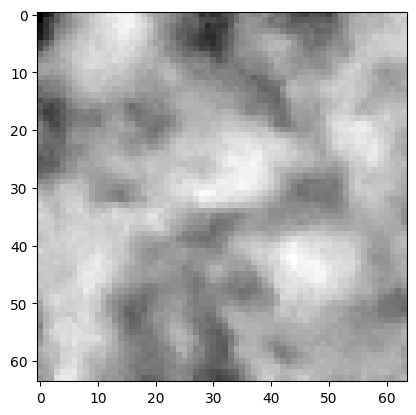

Epoch 42 : 


100%|██████████| 50/50 [00:03<00:00, 13.33it/s]


loss 0.1428441419544633
Epoch 43 : 


100%|██████████| 50/50 [00:03<00:00, 12.87it/s]


loss 0.16013496240495292
Epoch 44 : 


100%|██████████| 50/50 [00:03<00:00, 13.31it/s]


loss 0.22519932067076975
Epoch 45 : 


100%|██████████| 50/50 [00:03<00:00, 13.80it/s]


loss 0.15655580728273313
Epoch 46 : 


100%|██████████| 50/50 [00:03<00:00, 13.34it/s]


loss 0.1755375216890196
Epoch 47 : 


100%|██████████| 50/50 [00:03<00:00, 12.69it/s]


loss 0.16278616924681238
Epoch 48 : 


100%|██████████| 50/50 [00:03<00:00, 12.86it/s]


loss 0.19127922765861716
Epoch 49 : 


100%|██████████| 50/50 [00:03<00:00, 13.09it/s]


loss 0.1507191845056384
Epoch 50 : 


100%|██████████| 50/50 [00:03<00:00, 14.13it/s]


loss 0.17861972971509252
Epoch 51 : 


100%|██████████| 50/50 [00:03<00:00, 13.56it/s]


loss 0.20521551860842718
Epoch 52 : 


100%|██████████| 50/50 [00:03<00:00, 13.45it/s]


loss 0.1599746106540796
Epoch 53 : 


100%|██████████| 50/50 [00:03<00:00, 13.59it/s]


loss 0.15713726960441662
Epoch 54 : 


100%|██████████| 50/50 [00:03<00:00, 13.37it/s]


loss 0.1331226962992199
Epoch 55 : 


100%|██████████| 50/50 [00:03<00:00, 13.29it/s]


loss 0.16933882600906291
Epoch 56 : 


100%|██████████| 50/50 [00:03<00:00, 13.64it/s]


loss 0.1571470281086399
Epoch 57 : 


100%|██████████| 50/50 [00:03<00:00, 13.19it/s]


loss 0.22450414661696141
Epoch 58 : 


100%|██████████| 50/50 [00:03<00:00, 13.38it/s]


loss 0.1633647553002487
Epoch 59 : 


100%|██████████| 50/50 [00:03<00:00, 13.42it/s]


loss 0.15473392781599435
Epoch 60 : 


100%|██████████| 50/50 [00:03<00:00, 13.46it/s]


loss 0.19631718831310152
Epoch 61 : 


100%|██████████| 50/50 [00:03<00:00, 14.04it/s]


loss 0.17657760647435514
torch.Size([3, 1, 64, 64])


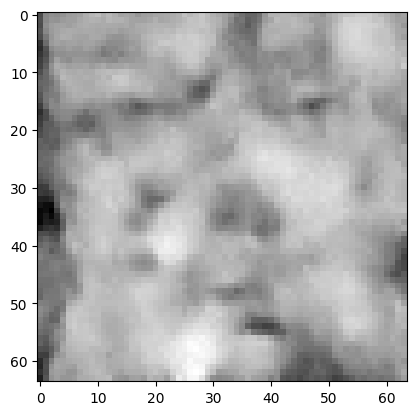

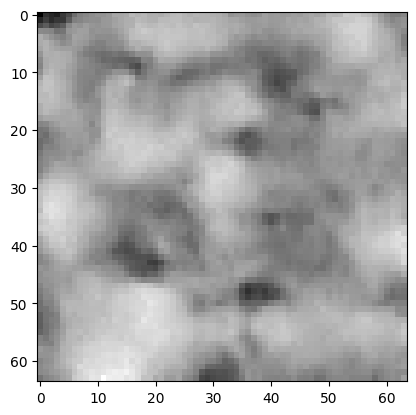

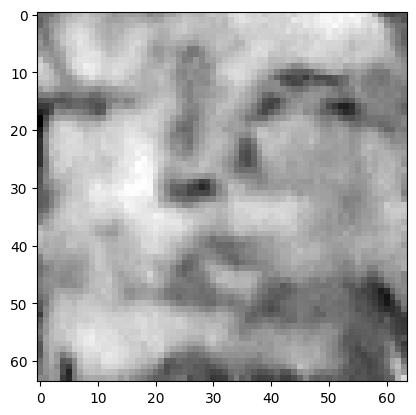

Epoch 62 : 


100%|██████████| 50/50 [00:03<00:00, 13.15it/s]


loss 0.16274473054653815
Epoch 63 : 


100%|██████████| 50/50 [00:03<00:00, 13.27it/s]


loss 0.15902319490819797
Epoch 64 : 


100%|██████████| 50/50 [00:03<00:00, 13.22it/s]


loss 0.1740452698977179
Epoch 65 : 


100%|██████████| 50/50 [00:03<00:00, 13.72it/s]


loss 0.14415033686869655
Epoch 66 : 


100%|██████████| 50/50 [00:03<00:00, 13.28it/s]


loss 0.1524643275666817
Epoch 67 : 


100%|██████████| 50/50 [00:03<00:00, 13.59it/s]


loss 0.1819354195248152
Epoch 68 : 


100%|██████████| 50/50 [00:03<00:00, 13.74it/s]


loss 0.17736944574750435
Epoch 69 : 


100%|██████████| 50/50 [00:03<00:00, 13.80it/s]


loss 0.15614587327966067
Epoch 70 : 


100%|██████████| 50/50 [00:03<00:00, 13.79it/s]


loss 0.1532565414195394
Epoch 71 : 


100%|██████████| 50/50 [00:03<00:00, 13.61it/s]


loss 0.1514567933658702
Epoch 72 : 


100%|██████████| 50/50 [00:03<00:00, 13.73it/s]


loss 0.1620166227596715
Epoch 73 : 


100%|██████████| 50/50 [00:03<00:00, 13.50it/s]


loss 0.13245876287087005
Epoch 74 : 


100%|██████████| 50/50 [00:03<00:00, 13.35it/s]


loss 0.13662354081701103
Epoch 75 : 


100%|██████████| 50/50 [00:03<00:00, 13.45it/s]


loss 0.15198207018830798
Epoch 76 : 


100%|██████████| 50/50 [00:03<00:00, 13.30it/s]


loss 0.14587912838016992
Epoch 77 : 


100%|██████████| 50/50 [00:03<00:00, 13.43it/s]


loss 0.1593499963488391
Epoch 78 : 


100%|██████████| 50/50 [00:03<00:00, 13.68it/s]


loss 0.15040921887390102
Epoch 79 : 


100%|██████████| 50/50 [00:03<00:00, 13.06it/s]


loss 0.1619457524796155
Epoch 80 : 


100%|██████████| 50/50 [00:03<00:00, 13.20it/s]


loss 0.16368958192681451
Epoch 81 : 


100%|██████████| 50/50 [00:03<00:00, 13.94it/s]


loss 0.1447512794250475
torch.Size([3, 1, 64, 64])


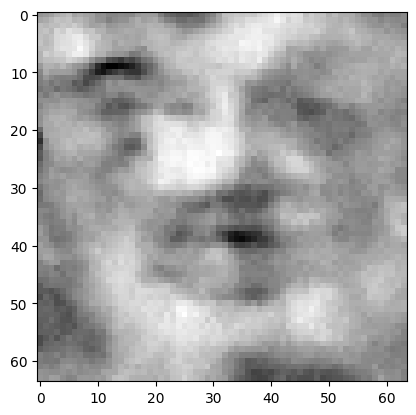

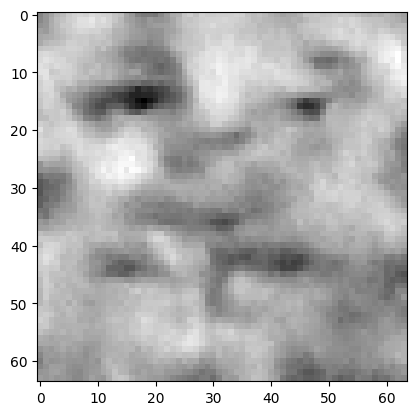

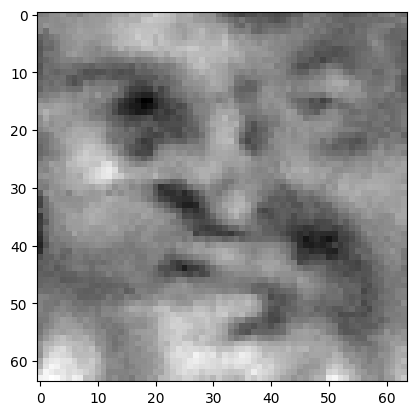

Epoch 82 : 


100%|██████████| 50/50 [00:03<00:00, 12.98it/s]


loss 0.148525489666543
Epoch 83 : 


100%|██████████| 50/50 [00:03<00:00, 13.67it/s]


loss 0.14566877079734022
Epoch 84 : 


100%|██████████| 50/50 [00:03<00:00, 13.21it/s]


loss 0.15669616740828832
Epoch 85 : 


100%|██████████| 50/50 [00:03<00:00, 13.41it/s]


loss 0.16997765621078204
Epoch 86 : 


100%|██████████| 50/50 [00:03<00:00, 13.90it/s]


loss 0.1689623746036224
Epoch 87 : 


100%|██████████| 50/50 [00:03<00:00, 13.64it/s]


loss 0.1513444149791482
Epoch 88 : 


100%|██████████| 50/50 [00:03<00:00, 13.40it/s]


loss 0.17350918650634417
Epoch 89 : 


100%|██████████| 50/50 [00:03<00:00, 13.34it/s]


loss 0.16156656438226136
Epoch 90 : 


100%|██████████| 50/50 [00:03<00:00, 13.89it/s]


loss 0.1552034592466189
Epoch 91 : 


100%|██████████| 50/50 [00:03<00:00, 13.48it/s]


loss 0.16963041301189172
Epoch 92 : 


100%|██████████| 50/50 [00:03<00:00, 12.93it/s]


loss 0.1346307137625533
Epoch 93 : 


100%|██████████| 50/50 [00:03<00:00, 13.38it/s]


loss 0.12540450567884315
Epoch 94 : 


100%|██████████| 50/50 [00:03<00:00, 13.10it/s]


loss 0.19366945554665072
Epoch 95 : 


100%|██████████| 50/50 [00:03<00:00, 13.81it/s]


loss 0.15476128326735814
Epoch 96 : 


100%|██████████| 50/50 [00:03<00:00, 13.61it/s]


loss 0.1443675991985944
Epoch 97 : 


100%|██████████| 50/50 [00:03<00:00, 13.61it/s]


loss 0.18273861923447113
Epoch 98 : 


100%|██████████| 50/50 [00:03<00:00, 14.13it/s]


loss 0.18678390184704965
Epoch 99 : 


100%|██████████| 50/50 [00:03<00:00, 13.42it/s]


loss 0.1787942667750077


In [9]:
train_ddpm(100, 0.001, 1, 0.0000)

Epoch 0 : 


100%|██████████| 50/50 [00:03<00:00, 13.50it/s]


loss 0.16548546102551184
Epoch 1 : 


100%|██████████| 50/50 [00:03<00:00, 13.64it/s]


loss 0.15759164645524648
torch.Size([3, 1, 64, 64])


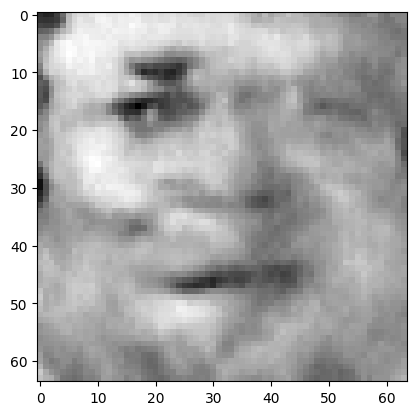

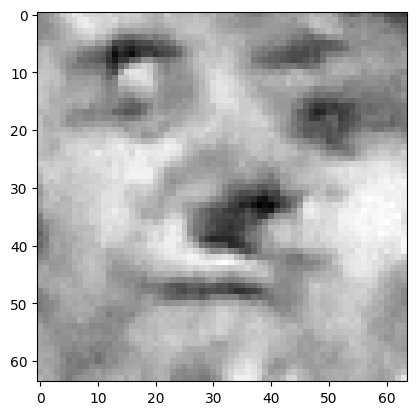

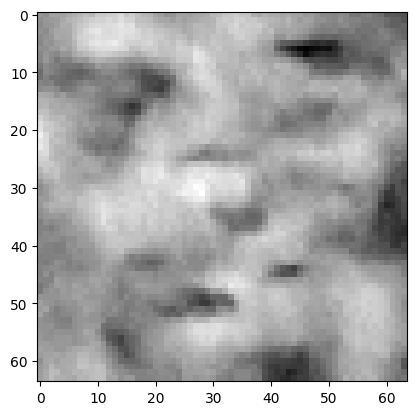

Epoch 2 : 


100%|██████████| 50/50 [00:03<00:00, 13.75it/s]


loss 0.15199230672870728
Epoch 3 : 


100%|██████████| 50/50 [00:03<00:00, 13.43it/s]


loss 0.14876598335216032
Epoch 4 : 


100%|██████████| 50/50 [00:03<00:00, 13.75it/s]


loss 0.1681308036834118
Epoch 5 : 


100%|██████████| 50/50 [00:03<00:00, 12.78it/s]


loss 0.17154950378040768
Epoch 6 : 


100%|██████████| 50/50 [00:03<00:00, 12.78it/s]


loss 0.14253232293657814
Epoch 7 : 


100%|██████████| 50/50 [00:03<00:00, 13.49it/s]


loss 0.13800217562447636
Epoch 8 : 


100%|██████████| 50/50 [00:03<00:00, 13.48it/s]


loss 0.13978703227156972
Epoch 9 : 


100%|██████████| 50/50 [00:03<00:00, 13.86it/s]


loss 0.14489366422759714
Epoch 10 : 


100%|██████████| 50/50 [00:03<00:00, 14.18it/s]


loss 0.1521055726419226
Epoch 11 : 


100%|██████████| 50/50 [00:03<00:00, 13.82it/s]


loss 0.18418080332931497
Epoch 12 : 


100%|██████████| 50/50 [00:03<00:00, 13.40it/s]


loss 0.16514471374023876
Epoch 13 : 


100%|██████████| 50/50 [00:03<00:00, 13.39it/s]


loss 0.22465807915264116
Epoch 14 : 


100%|██████████| 50/50 [00:03<00:00, 13.28it/s]


loss 0.16394612014116236
Epoch 15 : 


100%|██████████| 50/50 [00:03<00:00, 13.29it/s]


loss 0.1493947811598595
Epoch 16 : 


100%|██████████| 50/50 [00:03<00:00, 13.87it/s]


loss 0.16190686784321448
Epoch 17 : 


100%|██████████| 50/50 [00:03<00:00, 13.40it/s]


loss 0.15530183648297718
Epoch 18 : 


100%|██████████| 50/50 [00:03<00:00, 13.43it/s]


loss 0.1539006733235591
Epoch 19 : 


100%|██████████| 50/50 [00:03<00:00, 13.44it/s]


loss 0.19600931278294156
Epoch 20 : 


100%|██████████| 50/50 [00:03<00:00, 13.31it/s]


loss 0.16113436707565013
Epoch 21 : 


100%|██████████| 50/50 [00:03<00:00, 13.63it/s]


loss 0.17788748670603224
torch.Size([3, 1, 64, 64])


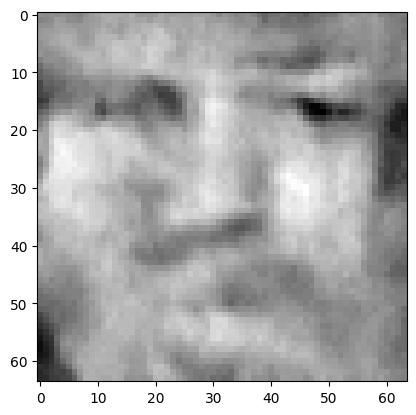

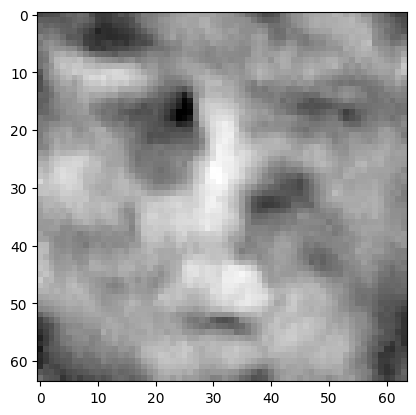

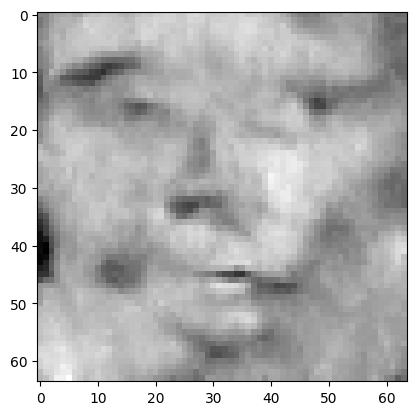

Epoch 22 : 


100%|██████████| 50/50 [00:03<00:00, 13.58it/s]


loss 0.17528261462343067
Epoch 23 : 


100%|██████████| 50/50 [00:03<00:00, 13.91it/s]


loss 0.1452896396586047
Epoch 24 : 


100%|██████████| 50/50 [00:03<00:00, 13.46it/s]


loss 0.14421952022853826
Epoch 25 : 


100%|██████████| 50/50 [00:03<00:00, 13.53it/s]


loss 0.16386635602454191
Epoch 26 : 


100%|██████████| 50/50 [00:03<00:00, 12.94it/s]


loss 0.15100392758216868
Epoch 27 : 


100%|██████████| 50/50 [00:03<00:00, 12.97it/s]


loss 0.1494236842793925
Epoch 28 : 


100%|██████████| 50/50 [00:03<00:00, 13.65it/s]


loss 0.15965632778833483
Epoch 29 : 


100%|██████████| 50/50 [00:03<00:00, 13.81it/s]


loss 0.13259720275321055
Epoch 30 : 


100%|██████████| 50/50 [00:03<00:00, 13.49it/s]


loss 0.14082490692407718
Epoch 31 : 


100%|██████████| 50/50 [00:03<00:00, 13.51it/s]


loss 0.16434151505504901
Epoch 32 : 


100%|██████████| 50/50 [00:03<00:00, 13.37it/s]


loss 0.12352437553972913
Epoch 33 : 


100%|██████████| 50/50 [00:03<00:00, 12.64it/s]


loss 0.16716001091578067
Epoch 34 : 


100%|██████████| 50/50 [00:03<00:00, 13.28it/s]


loss 0.16686466455260887
Epoch 35 : 


100%|██████████| 50/50 [00:03<00:00, 13.31it/s]


loss 0.1850899932102256
Epoch 36 : 


100%|██████████| 50/50 [00:03<00:00, 13.80it/s]


loss 0.17203452890538812
Epoch 37 : 


100%|██████████| 50/50 [00:03<00:00, 13.49it/s]


loss 0.1609241534292007
Epoch 38 : 


100%|██████████| 50/50 [00:03<00:00, 13.65it/s]


loss 0.1783669417911971
Epoch 39 : 


100%|██████████| 50/50 [00:03<00:00, 13.24it/s]


loss 0.17789140165585937
Epoch 40 : 


100%|██████████| 50/50 [00:03<00:00, 13.83it/s]


loss 0.15623798176196577
Epoch 41 : 


100%|██████████| 50/50 [00:03<00:00, 13.65it/s]


loss 0.1792292629408128
torch.Size([3, 1, 64, 64])


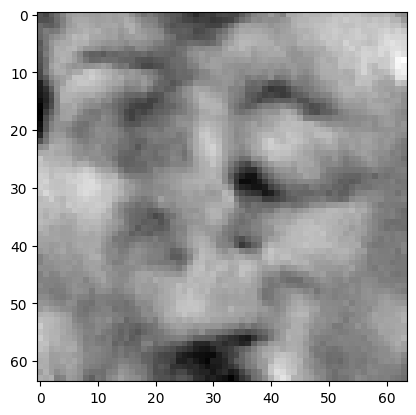

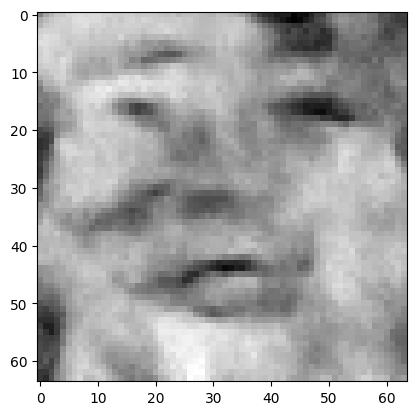

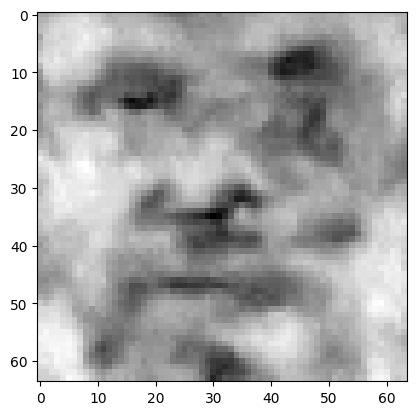

Epoch 42 : 


100%|██████████| 50/50 [00:03<00:00, 13.21it/s]


loss 0.1680166385358469
Epoch 43 : 


100%|██████████| 50/50 [00:03<00:00, 13.74it/s]


loss 0.15726278952242712
Epoch 44 : 


100%|██████████| 50/50 [00:03<00:00, 13.70it/s]


loss 0.14383104538288316
Epoch 45 : 


100%|██████████| 50/50 [00:03<00:00, 13.74it/s]


loss 0.16122326120721386
Epoch 46 : 


100%|██████████| 50/50 [00:03<00:00, 13.95it/s]


loss 0.12807781219806377
Epoch 47 : 


100%|██████████| 50/50 [00:03<00:00, 13.35it/s]


loss 0.1495099265991954
Epoch 48 : 


100%|██████████| 50/50 [00:03<00:00, 13.38it/s]


loss 0.15836862944777605
Epoch 49 : 


100%|██████████| 50/50 [00:03<00:00, 13.57it/s]


loss 0.15018400977659596
Epoch 50 : 


100%|██████████| 50/50 [00:03<00:00, 13.78it/s]


loss 0.14526550374711683
Epoch 51 : 


100%|██████████| 50/50 [00:03<00:00, 13.47it/s]


loss 0.15698368373693464
Epoch 52 : 


100%|██████████| 50/50 [00:03<00:00, 13.58it/s]


loss 0.15706839119210358
Epoch 53 : 


100%|██████████| 50/50 [00:03<00:00, 13.61it/s]


loss 0.18493340765834085
Epoch 54 : 


100%|██████████| 50/50 [00:03<00:00, 13.28it/s]


loss 0.17095130958108615
Epoch 55 : 


100%|██████████| 50/50 [00:03<00:00, 13.47it/s]


loss 0.16156723129406425
Epoch 56 : 


100%|██████████| 50/50 [00:03<00:00, 13.66it/s]


loss 0.21411656164960485
Epoch 57 : 


100%|██████████| 50/50 [00:03<00:00, 13.08it/s]


loss 0.14871894648590284
Epoch 58 : 


100%|██████████| 50/50 [00:03<00:00, 13.64it/s]


loss 0.13556755882435625
Epoch 59 : 


100%|██████████| 50/50 [00:03<00:00, 13.58it/s]


loss 0.15272760873170374
Epoch 60 : 


100%|██████████| 50/50 [00:03<00:00, 14.00it/s]


loss 0.1638873444299963
Epoch 61 : 


100%|██████████| 50/50 [00:03<00:00, 13.63it/s]


loss 0.16445776499935089
torch.Size([3, 1, 64, 64])


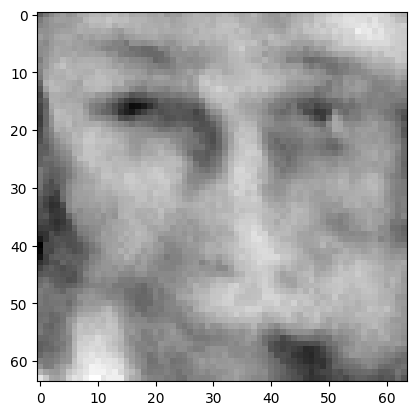

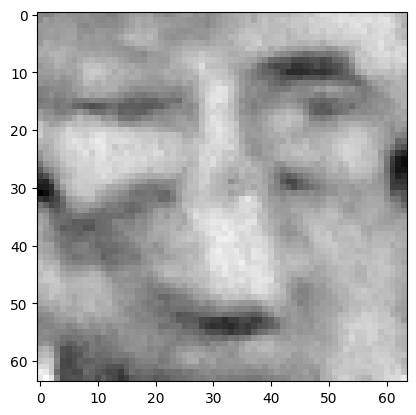

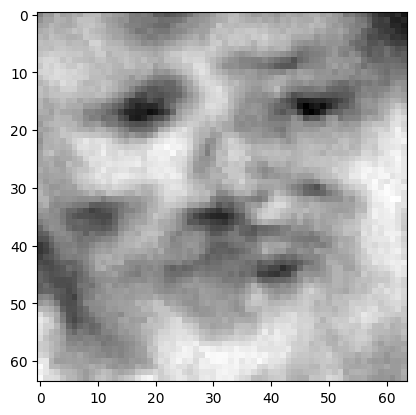

Epoch 62 : 


100%|██████████| 50/50 [00:03<00:00, 13.02it/s]


loss 0.14223924122327236
Epoch 63 : 


100%|██████████| 50/50 [00:03<00:00, 14.05it/s]


loss 0.12706481039636058
Epoch 64 : 


100%|██████████| 50/50 [00:03<00:00, 13.38it/s]


loss 0.11966673052277249
Epoch 65 : 


100%|██████████| 50/50 [00:03<00:00, 13.93it/s]


loss 0.1579025391412511
Epoch 66 : 


100%|██████████| 50/50 [00:03<00:00, 13.92it/s]


loss 0.16576671088702008
Epoch 67 : 


100%|██████████| 50/50 [00:03<00:00, 13.38it/s]


loss 0.1268908838368804
Epoch 68 : 


100%|██████████| 50/50 [00:03<00:00, 13.38it/s]


loss 0.13335256671314902
Epoch 69 : 


100%|██████████| 50/50 [00:03<00:00, 13.16it/s]


loss 0.16682044195330625
Epoch 70 : 


100%|██████████| 50/50 [00:03<00:00, 13.88it/s]


loss 0.1333513283970854
Epoch 71 : 


100%|██████████| 50/50 [00:03<00:00, 13.25it/s]


loss 0.1324528123743357
Epoch 72 : 


100%|██████████| 50/50 [00:03<00:00, 14.12it/s]


loss 0.16915582992978914
Epoch 73 : 


100%|██████████| 50/50 [00:03<00:00, 13.67it/s]


loss 0.14527496106595103
Epoch 74 : 


100%|██████████| 50/50 [00:03<00:00, 13.74it/s]


loss 0.1583243814565589
Epoch 75 : 


100%|██████████| 50/50 [00:03<00:00, 13.87it/s]


loss 0.16703648796887893
Epoch 76 : 


100%|██████████| 50/50 [00:03<00:00, 13.54it/s]


loss 0.16008786673200098
Epoch 77 : 


100%|██████████| 50/50 [00:03<00:00, 14.25it/s]


loss 0.14054424971592783
Epoch 78 : 


100%|██████████| 50/50 [00:03<00:00, 13.58it/s]


loss 0.1688152990179484
Epoch 79 : 


100%|██████████| 50/50 [00:03<00:00, 13.67it/s]


loss 0.16434985095553306
Epoch 80 : 


100%|██████████| 50/50 [00:03<00:00, 13.40it/s]


loss 0.18334294383996572
Epoch 81 : 


100%|██████████| 50/50 [00:03<00:00, 13.23it/s]


loss 0.15536372189588252
torch.Size([3, 1, 64, 64])


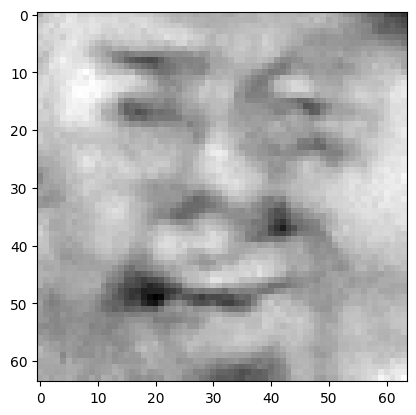

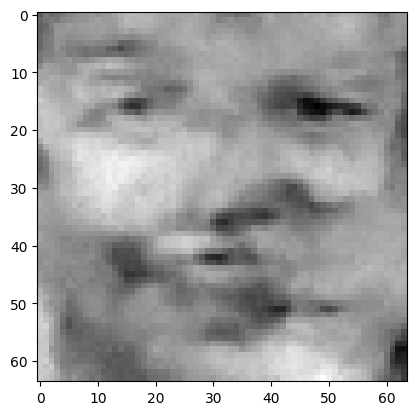

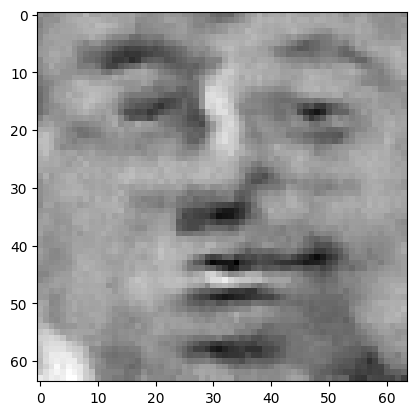

Epoch 82 : 


100%|██████████| 50/50 [00:03<00:00, 12.84it/s]


loss 0.1436511826996904
Epoch 83 : 


100%|██████████| 50/50 [00:03<00:00, 13.61it/s]


loss 0.1426419876333191
Epoch 84 : 


100%|██████████| 50/50 [00:03<00:00, 13.92it/s]


loss 0.12557590851289815
Epoch 85 : 


100%|██████████| 50/50 [00:03<00:00, 12.99it/s]


loss 0.17256220856177845
Epoch 86 : 


100%|██████████| 50/50 [00:03<00:00, 13.44it/s]


loss 0.172110795110577
Epoch 87 : 


100%|██████████| 50/50 [00:03<00:00, 13.51it/s]


loss 0.14566361162572042
Epoch 88 : 


100%|██████████| 50/50 [00:03<00:00, 13.68it/s]


loss 0.13554451887853852
Epoch 89 : 


100%|██████████| 50/50 [00:03<00:00, 13.92it/s]


loss 0.147271432855152
Epoch 90 : 


100%|██████████| 50/50 [00:03<00:00, 13.32it/s]


loss 0.16975741540259873
Epoch 91 : 


100%|██████████| 50/50 [00:03<00:00, 13.72it/s]


loss 0.1280752769133004
Epoch 92 : 


100%|██████████| 50/50 [00:03<00:00, 13.68it/s]


loss 0.1562488380560941
Epoch 93 : 


100%|██████████| 50/50 [00:03<00:00, 13.22it/s]


loss 0.14575704318340865
Epoch 94 : 


100%|██████████| 50/50 [00:03<00:00, 13.27it/s]


loss 0.14544984640576866
Epoch 95 : 


100%|██████████| 50/50 [00:03<00:00, 13.37it/s]


loss 0.18691176944794635
Epoch 96 : 


100%|██████████| 50/50 [00:03<00:00, 13.73it/s]


loss 0.13714997945025234
Epoch 97 : 


100%|██████████| 50/50 [00:03<00:00, 13.43it/s]


loss 0.1393599914765564
Epoch 98 : 


100%|██████████| 50/50 [00:03<00:00, 13.81it/s]


loss 0.19155850502364036
Epoch 99 : 


100%|██████████| 50/50 [00:03<00:00, 13.60it/s]


loss 0.17400117758085124


In [10]:
train_ddpm(100, 0.001, 1, 0.0000)

Epoch 0 : 


100%|██████████| 50/50 [00:03<00:00, 13.61it/s]


loss 0.1375642151371038
Epoch 1 : 


100%|██████████| 50/50 [00:03<00:00, 13.59it/s]


loss 0.1348732723333598
torch.Size([3, 1, 64, 64])


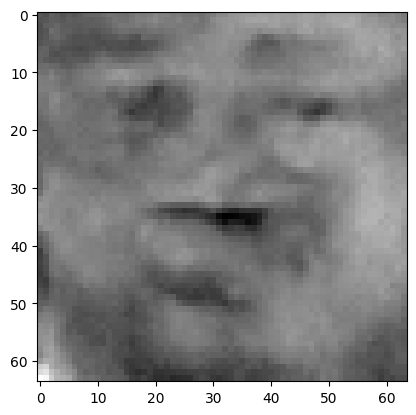

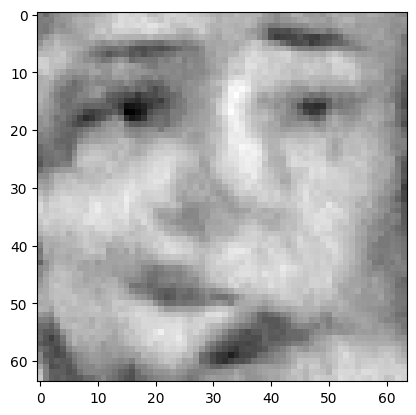

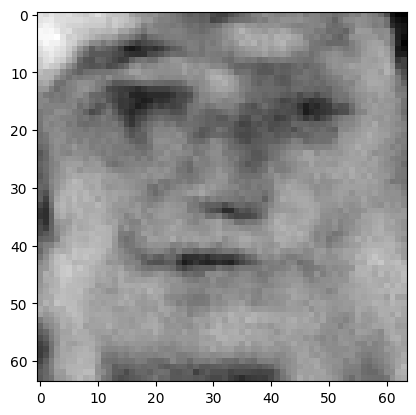

Epoch 2 : 


100%|██████████| 50/50 [00:03<00:00, 13.77it/s]


loss 0.17537995717622365
Epoch 3 : 


100%|██████████| 50/50 [00:03<00:00, 13.59it/s]


loss 0.14374008828240853
Epoch 4 : 


100%|██████████| 50/50 [00:03<00:00, 13.22it/s]


loss 0.12160831841983659
Epoch 5 : 


100%|██████████| 50/50 [00:03<00:00, 13.53it/s]


loss 0.1316896267572174
Epoch 6 : 


100%|██████████| 50/50 [00:03<00:00, 13.55it/s]


loss 0.1710947988722364
Epoch 7 : 


100%|██████████| 50/50 [00:03<00:00, 14.40it/s]


loss 0.11728126421913361
Epoch 8 : 


100%|██████████| 50/50 [00:03<00:00, 14.33it/s]


loss 0.1558259046078957
Epoch 9 : 


100%|██████████| 50/50 [00:03<00:00, 13.43it/s]


loss 0.1466062878261704
Epoch 10 : 


100%|██████████| 50/50 [00:03<00:00, 13.36it/s]


loss 0.12514229105755495
Epoch 11 : 


100%|██████████| 50/50 [00:03<00:00, 13.37it/s]


loss 0.15558734228113114
Epoch 12 : 


100%|██████████| 50/50 [00:03<00:00, 13.79it/s]


loss 0.12751890254026838
Epoch 13 : 


100%|██████████| 50/50 [00:03<00:00, 13.87it/s]


loss 0.16799782189955556
Epoch 14 : 


100%|██████████| 50/50 [00:03<00:00, 13.05it/s]


loss 0.14882607805893613
Epoch 15 : 


100%|██████████| 50/50 [00:03<00:00, 13.88it/s]


loss 0.140593704189301
Epoch 16 : 


100%|██████████| 50/50 [00:03<00:00, 13.97it/s]


loss 0.1263044267897159
Epoch 17 : 


100%|██████████| 50/50 [00:03<00:00, 13.64it/s]


loss 0.14612169806758163
Epoch 18 : 


100%|██████████| 50/50 [00:03<00:00, 13.77it/s]


loss 0.15222784730855454
Epoch 19 : 


100%|██████████| 50/50 [00:03<00:00, 13.76it/s]


loss 0.15297677402128523
Epoch 20 : 


100%|██████████| 50/50 [00:03<00:00, 12.99it/s]


loss 0.15056454277744172
Epoch 21 : 


100%|██████████| 50/50 [00:03<00:00, 13.76it/s]


loss 0.15299127407334875
torch.Size([3, 1, 64, 64])


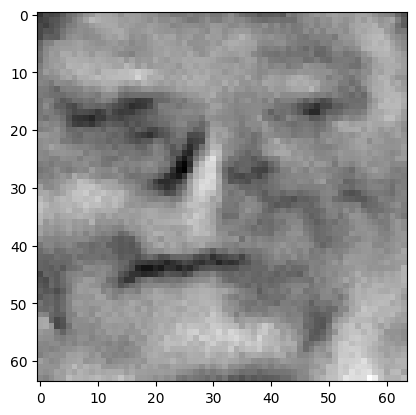

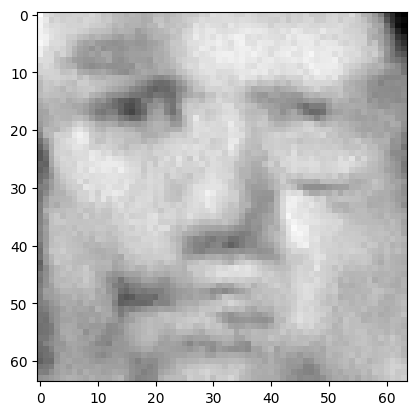

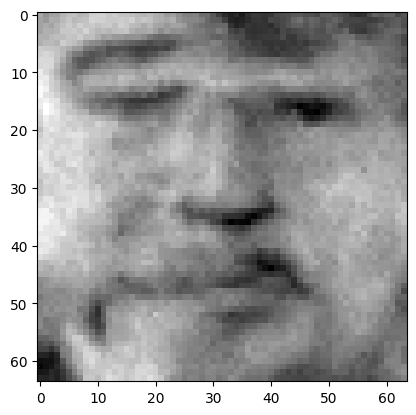

Epoch 22 : 


100%|██████████| 50/50 [00:03<00:00, 13.89it/s]


loss 0.1598526353437073
Epoch 23 : 


100%|██████████| 50/50 [00:03<00:00, 13.48it/s]


loss 0.1278072984211536
Epoch 24 : 


100%|██████████| 50/50 [00:03<00:00, 13.59it/s]


loss 0.14550330654641042
Epoch 25 : 


100%|██████████| 50/50 [00:03<00:00, 13.46it/s]


loss 0.1444127169931154
Epoch 26 : 


100%|██████████| 50/50 [00:03<00:00, 13.20it/s]


loss 0.14610172244815242
Epoch 27 : 


100%|██████████| 50/50 [00:03<00:00, 13.46it/s]


loss 0.14888290454601655
Epoch 28 : 


100%|██████████| 50/50 [00:03<00:00, 13.34it/s]


loss 0.12872697766455093
Epoch 29 : 


100%|██████████| 50/50 [00:03<00:00, 13.09it/s]


loss 0.13499507345101663
Epoch 30 : 


100%|██████████| 50/50 [00:03<00:00, 13.44it/s]


loss 0.1734421441020489
Epoch 31 : 


100%|██████████| 50/50 [00:03<00:00, 13.62it/s]


loss 0.12929785575508246
Epoch 32 : 


100%|██████████| 50/50 [00:03<00:00, 13.23it/s]


loss 0.14810684829704027
Epoch 33 : 


100%|██████████| 50/50 [00:03<00:00, 13.38it/s]


loss 0.15805382203464008
Epoch 34 : 


100%|██████████| 50/50 [00:03<00:00, 13.97it/s]


loss 0.14650834764793222
Epoch 35 : 


100%|██████████| 50/50 [00:03<00:00, 13.70it/s]


loss 0.11731571267196915
Epoch 36 : 


100%|██████████| 50/50 [00:03<00:00, 14.17it/s]


loss 0.11998900505524447
Epoch 37 : 


100%|██████████| 50/50 [00:03<00:00, 13.27it/s]


loss 0.15424081655606714
Epoch 38 : 


100%|██████████| 50/50 [00:03<00:00, 13.45it/s]


loss 0.1677249626449078
Epoch 39 : 


100%|██████████| 50/50 [00:03<00:00, 13.39it/s]


loss 0.16686527637319332
Epoch 40 : 


100%|██████████| 50/50 [00:03<00:00, 13.60it/s]


loss 0.14638761077154677
Epoch 41 : 


100%|██████████| 50/50 [00:03<00:00, 13.63it/s]


loss 0.1364931535749293
torch.Size([3, 1, 64, 64])


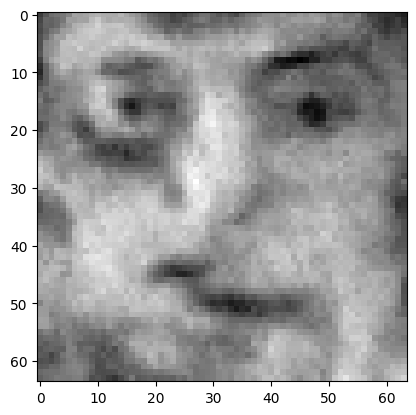

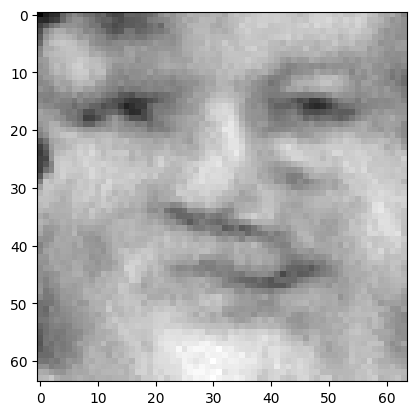

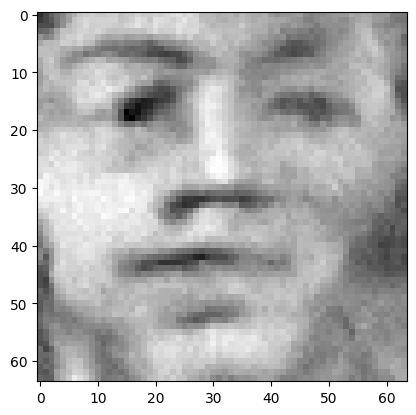

Epoch 42 : 


100%|██████████| 50/50 [00:03<00:00, 13.84it/s]


loss 0.15386866804488647
Epoch 43 : 


100%|██████████| 50/50 [00:03<00:00, 13.73it/s]


loss 0.11403788611481294
Epoch 44 : 


100%|██████████| 50/50 [00:03<00:00, 13.11it/s]


loss 0.14646350614929893
Epoch 45 : 


100%|██████████| 50/50 [00:03<00:00, 13.03it/s]


loss 0.15385698748608523
Epoch 46 : 


100%|██████████| 50/50 [00:03<00:00, 14.10it/s]


loss 0.1480428639178724
Epoch 47 : 


100%|██████████| 50/50 [00:03<00:00, 13.52it/s]


loss 0.14519102065253958
Epoch 48 : 


100%|██████████| 50/50 [00:03<00:00, 14.11it/s]


loss 0.12650145125954332
Epoch 49 : 


100%|██████████| 50/50 [00:03<00:00, 13.84it/s]


loss 0.1360363361295659
Epoch 50 : 


100%|██████████| 50/50 [00:03<00:00, 13.25it/s]


loss 0.15161211158137944
Epoch 51 : 


100%|██████████| 50/50 [00:03<00:00, 13.38it/s]


loss 0.18653478842584906
Epoch 52 : 


100%|██████████| 50/50 [00:03<00:00, 12.84it/s]


loss 0.14266865679960877
Epoch 53 : 


100%|██████████| 50/50 [00:03<00:00, 13.12it/s]


loss 0.1413792317201318
Epoch 54 : 


100%|██████████| 50/50 [00:03<00:00, 13.50it/s]


loss 0.1473932898681272
Epoch 55 : 


100%|██████████| 50/50 [00:03<00:00, 13.68it/s]


loss 0.15030193132383682
Epoch 56 : 


100%|██████████| 50/50 [00:03<00:00, 12.96it/s]


loss 0.1683078372045935
Epoch 57 : 


100%|██████████| 50/50 [00:03<00:00, 13.81it/s]


loss 0.12554364136319793
Epoch 58 : 


100%|██████████| 50/50 [00:04<00:00, 12.43it/s]


loss 0.1513421551734231
Epoch 59 : 


100%|██████████| 50/50 [00:03<00:00, 13.32it/s]


loss 0.13551410514358894
Epoch 60 : 


100%|██████████| 50/50 [00:03<00:00, 13.59it/s]


loss 0.18368905778845201
Epoch 61 : 


100%|██████████| 50/50 [00:03<00:00, 13.90it/s]


loss 0.16252094840590608
torch.Size([3, 1, 64, 64])


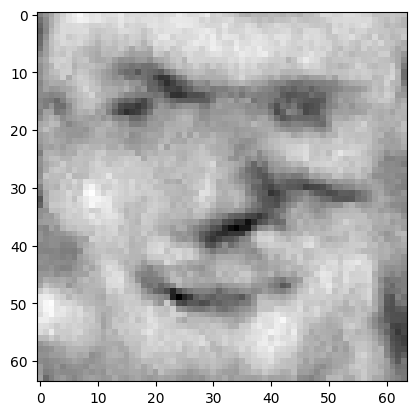

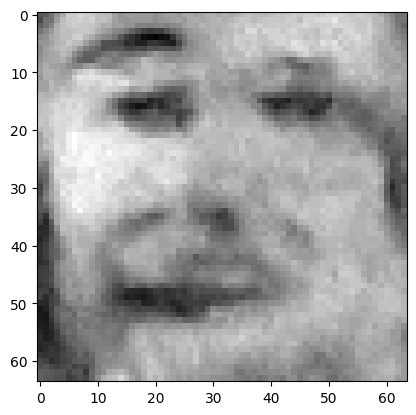

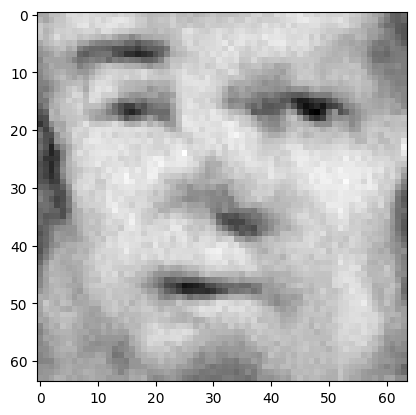

Epoch 62 : 


100%|██████████| 50/50 [00:03<00:00, 13.82it/s]


loss 0.1425861399878881
Epoch 63 : 


100%|██████████| 50/50 [00:03<00:00, 13.95it/s]


loss 0.12382295556544655
Epoch 64 : 


100%|██████████| 50/50 [00:03<00:00, 13.48it/s]


loss 0.20264654878638225
Epoch 65 : 


100%|██████████| 50/50 [00:03<00:00, 13.31it/s]


loss 0.1672448855108584
Epoch 66 : 


100%|██████████| 50/50 [00:03<00:00, 13.47it/s]


loss 0.12731056445795005
Epoch 67 : 


100%|██████████| 50/50 [00:03<00:00, 12.70it/s]


loss 0.152480788056042
Epoch 68 : 


100%|██████████| 50/50 [00:03<00:00, 13.79it/s]


loss 0.12758927187837413
Epoch 69 : 


100%|██████████| 50/50 [00:03<00:00, 13.61it/s]


loss 0.1620404848870126
Epoch 70 : 


100%|██████████| 50/50 [00:03<00:00, 13.50it/s]


loss 0.15191564816598874
Epoch 71 : 


100%|██████████| 50/50 [00:03<00:00, 13.64it/s]


loss 0.11550096927218101
Epoch 72 : 


100%|██████████| 50/50 [00:03<00:00, 13.28it/s]


loss 0.14127937148964892
Epoch 73 : 


100%|██████████| 50/50 [00:03<00:00, 13.76it/s]


loss 0.15781963457746584
Epoch 74 : 


100%|██████████| 50/50 [00:03<00:00, 13.83it/s]


loss 0.1443948786965096
Epoch 75 : 


100%|██████████| 50/50 [00:03<00:00, 13.69it/s]


loss 0.11833214991837424
Epoch 76 : 


100%|██████████| 50/50 [00:03<00:00, 13.34it/s]


loss 0.14234140098179018
Epoch 77 : 


100%|██████████| 50/50 [00:03<00:00, 13.48it/s]


loss 0.19875106906695328
Epoch 78 : 


100%|██████████| 50/50 [00:03<00:00, 13.28it/s]


loss 0.13491864405793863
Epoch 79 : 


100%|██████████| 50/50 [00:03<00:00, 13.34it/s]


loss 0.22517738984488617
Epoch 80 : 


100%|██████████| 50/50 [00:03<00:00, 13.76it/s]


loss 0.14027287076462464
Epoch 81 : 


100%|██████████| 50/50 [00:03<00:00, 13.00it/s]


loss 0.12296101994707487
torch.Size([3, 1, 64, 64])


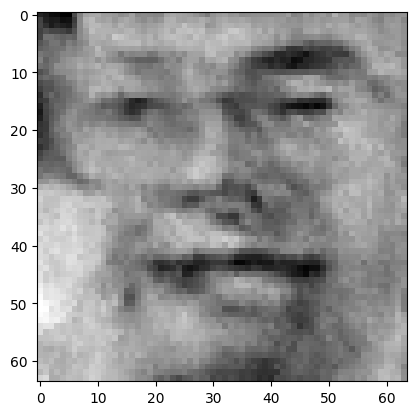

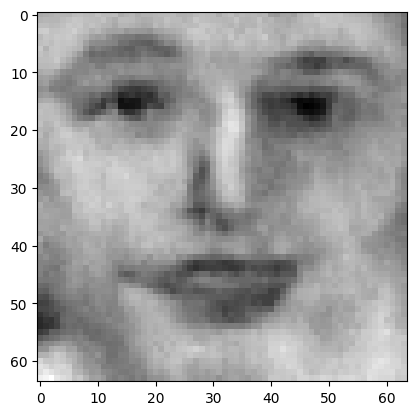

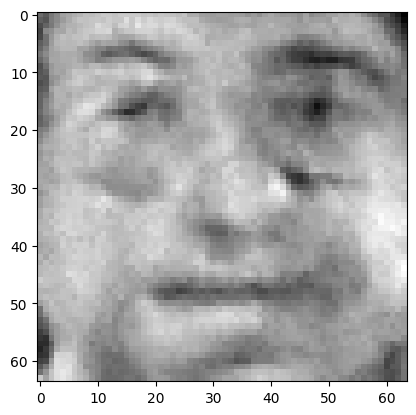

Epoch 82 : 


100%|██████████| 50/50 [00:03<00:00, 13.41it/s]


loss 0.16916143873973868
Epoch 83 : 


100%|██████████| 50/50 [00:03<00:00, 13.97it/s]


loss 0.17276675163155103
Epoch 84 : 


100%|██████████| 50/50 [00:03<00:00, 13.79it/s]


loss 0.16247774103455837
Epoch 85 : 


100%|██████████| 50/50 [00:03<00:00, 13.38it/s]


loss 0.145094070395769
Epoch 86 : 


100%|██████████| 50/50 [00:03<00:00, 13.53it/s]


loss 0.13488217790306548
Epoch 87 : 


100%|██████████| 50/50 [00:03<00:00, 13.28it/s]


loss 0.14356588587501978
Epoch 88 : 


100%|██████████| 50/50 [00:03<00:00, 14.12it/s]


loss 0.13939811243655867
Epoch 89 : 


100%|██████████| 50/50 [00:03<00:00, 13.33it/s]


loss 0.14644809806209497
Epoch 90 : 


100%|██████████| 50/50 [00:03<00:00, 13.49it/s]


loss 0.15114347611254217
Epoch 91 : 


100%|██████████| 50/50 [00:03<00:00, 13.55it/s]


loss 0.1268233733540655
Epoch 92 : 


100%|██████████| 50/50 [00:03<00:00, 13.55it/s]


loss 0.12244000911018077
Epoch 93 : 


100%|██████████| 50/50 [00:03<00:00, 13.90it/s]


loss 0.1514294275526918
Epoch 94 : 


100%|██████████| 50/50 [00:03<00:00, 13.96it/s]


loss 0.13905057690068312
Epoch 95 : 


100%|██████████| 50/50 [00:03<00:00, 13.86it/s]


loss 0.09993916498210229
Epoch 96 : 


100%|██████████| 50/50 [00:03<00:00, 12.81it/s]


loss 0.1292975945153075
Epoch 97 : 


100%|██████████| 50/50 [00:03<00:00, 13.47it/s]


loss 0.1527058228836247
Epoch 98 : 


100%|██████████| 50/50 [00:03<00:00, 12.70it/s]


loss 0.12419695036683312
Epoch 99 : 


100%|██████████| 50/50 [00:03<00:00, 12.88it/s]


loss 0.1407176008038009
Epoch 100 : 


100%|██████████| 50/50 [00:03<00:00, 13.18it/s]


loss 0.13794736721145837
Epoch 101 : 


100%|██████████| 50/50 [00:03<00:00, 13.50it/s]


loss 0.17587326434693124
torch.Size([3, 1, 64, 64])


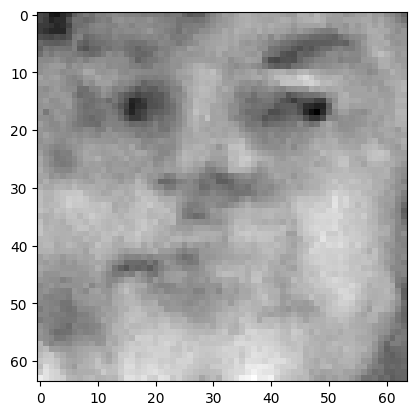

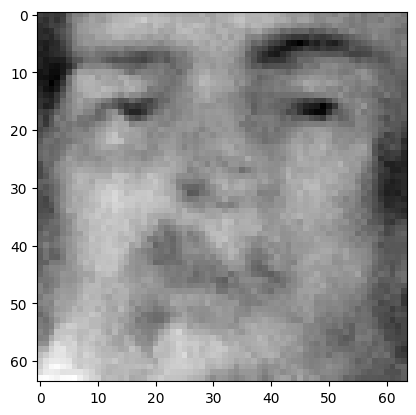

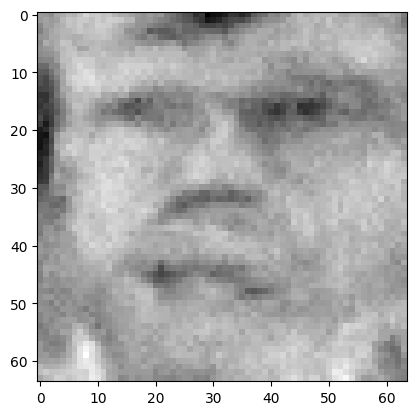

Epoch 102 : 


100%|██████████| 50/50 [00:03<00:00, 13.73it/s]


loss 0.12141782489313052
Epoch 103 : 


100%|██████████| 50/50 [00:03<00:00, 13.54it/s]


loss 0.13751751750599525
Epoch 104 : 


100%|██████████| 50/50 [00:03<00:00, 13.43it/s]


loss 0.15395936463307677
Epoch 105 : 


100%|██████████| 50/50 [00:03<00:00, 13.80it/s]


loss 0.13505894288244613
Epoch 106 : 


100%|██████████| 50/50 [00:03<00:00, 13.69it/s]


loss 0.13860742054939806
Epoch 107 : 


100%|██████████| 50/50 [00:03<00:00, 13.36it/s]


loss 0.14062091419538927
Epoch 108 : 


100%|██████████| 50/50 [00:03<00:00, 13.83it/s]


loss 0.15404802156379277
Epoch 109 : 


100%|██████████| 50/50 [00:03<00:00, 14.32it/s]


loss 0.1338502943316298
Epoch 110 : 


100%|██████████| 50/50 [00:03<00:00, 13.31it/s]


loss 0.1490589106041292
Epoch 111 : 


100%|██████████| 50/50 [00:03<00:00, 13.74it/s]


loss 0.14133170906344134
Epoch 112 : 


100%|██████████| 50/50 [00:03<00:00, 13.53it/s]


loss 0.15820914447920023
Epoch 113 : 


100%|██████████| 50/50 [00:03<00:00, 13.01it/s]


loss 0.1713441867164499
Epoch 114 : 


100%|██████████| 50/50 [00:03<00:00, 12.92it/s]


loss 0.12028436338277274
Epoch 115 : 


100%|██████████| 50/50 [00:03<00:00, 13.68it/s]


loss 0.14981423126587207
Epoch 116 : 


100%|██████████| 50/50 [00:03<00:00, 13.90it/s]


loss 0.14503112628649353
Epoch 117 : 


100%|██████████| 50/50 [00:03<00:00, 13.81it/s]


loss 0.14128635490519917
Epoch 118 : 


100%|██████████| 50/50 [00:03<00:00, 13.52it/s]


loss 0.12030705972830805
Epoch 119 : 


100%|██████████| 50/50 [00:03<00:00, 13.31it/s]


loss 0.13083801604748313
Epoch 120 : 


100%|██████████| 50/50 [00:03<00:00, 13.35it/s]


loss 0.12158483242324357
Epoch 121 : 


100%|██████████| 50/50 [00:03<00:00, 13.61it/s]


loss 0.1414434999176853
torch.Size([3, 1, 64, 64])


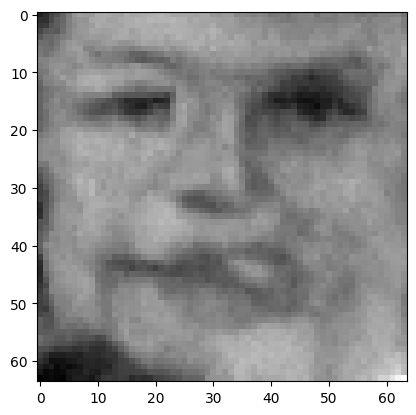

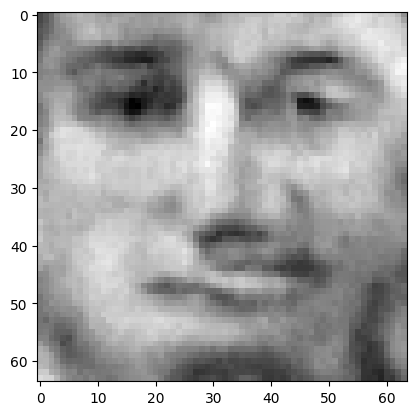

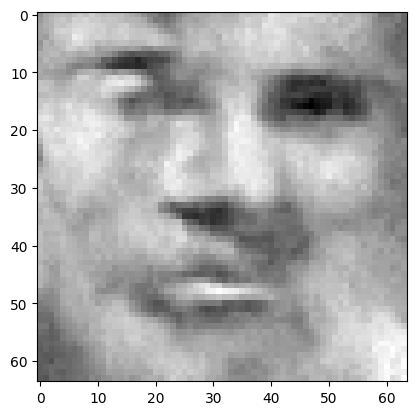

Epoch 122 : 


100%|██████████| 50/50 [00:03<00:00, 13.70it/s]


loss 0.1271497189988937
Epoch 123 : 


100%|██████████| 50/50 [00:03<00:00, 13.20it/s]


loss 0.15153079897402383
Epoch 124 : 


100%|██████████| 50/50 [00:03<00:00, 13.74it/s]


loss 0.15078347500643238
Epoch 125 : 


100%|██████████| 50/50 [00:03<00:00, 14.02it/s]


loss 0.15144195019000747
Epoch 126 : 


100%|██████████| 50/50 [00:03<00:00, 13.95it/s]


loss 0.12004783442958063
Epoch 127 : 


100%|██████████| 50/50 [00:03<00:00, 13.26it/s]


loss 0.15639339972686103
Epoch 128 : 


100%|██████████| 50/50 [00:03<00:00, 13.62it/s]


loss 0.12098159413728915
Epoch 129 : 


100%|██████████| 50/50 [00:03<00:00, 13.98it/s]


loss 0.1856153222601932
Epoch 130 : 


100%|██████████| 50/50 [00:03<00:00, 13.57it/s]


loss 0.12825503357972318
Epoch 131 : 


100%|██████████| 50/50 [00:03<00:00, 13.55it/s]


loss 0.1308429100734427
Epoch 132 : 


100%|██████████| 50/50 [00:03<00:00, 13.89it/s]


loss 0.14673284331661363
Epoch 133 : 


100%|██████████| 50/50 [00:03<00:00, 13.31it/s]


loss 0.1457741571349663
Epoch 134 : 


100%|██████████| 50/50 [00:03<00:00, 13.67it/s]


loss 0.17027348467248876
Epoch 135 : 


100%|██████████| 50/50 [00:03<00:00, 13.66it/s]


loss 0.14217321309284167
Epoch 136 : 


100%|██████████| 50/50 [00:03<00:00, 13.33it/s]


loss 0.15190813812387155
Epoch 137 : 


100%|██████████| 50/50 [00:03<00:00, 13.40it/s]


loss 0.10647858452339608
Epoch 138 : 


100%|██████████| 50/50 [00:03<00:00, 13.63it/s]


loss 0.1012881161691444
Epoch 139 : 


100%|██████████| 50/50 [00:03<00:00, 13.31it/s]


loss 0.10530173431702639
Epoch 140 : 


100%|██████████| 50/50 [00:03<00:00, 14.05it/s]


loss 0.12113202696948153
Epoch 141 : 


100%|██████████| 50/50 [00:03<00:00, 13.37it/s]


loss 0.14804097441971253
torch.Size([3, 1, 64, 64])


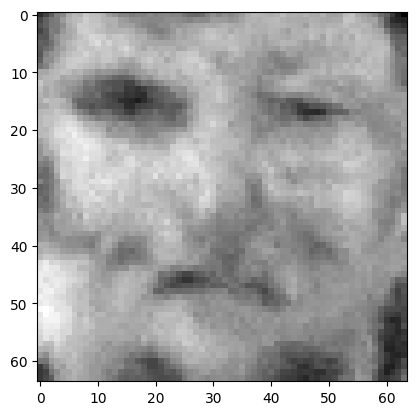

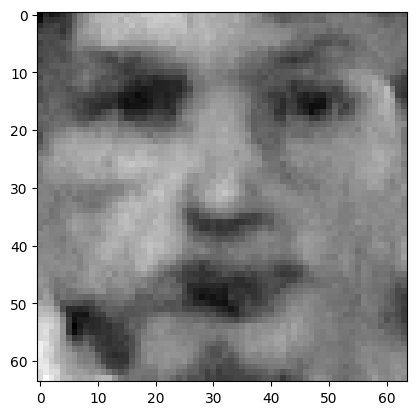

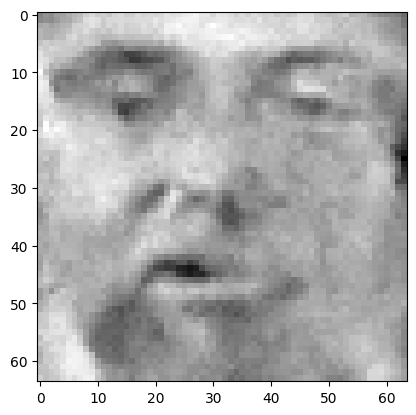

Epoch 142 : 


100%|██████████| 50/50 [00:03<00:00, 13.18it/s]


loss 0.19007023890104996
Epoch 143 : 


100%|██████████| 50/50 [00:03<00:00, 13.49it/s]


loss 0.1554142331529649
Epoch 144 : 


100%|██████████| 50/50 [00:03<00:00, 13.44it/s]


loss 0.15738160059600556
Epoch 145 : 


100%|██████████| 50/50 [00:03<00:00, 13.04it/s]


loss 0.13478427833190132
Epoch 146 : 


100%|██████████| 50/50 [00:03<00:00, 13.48it/s]


loss 0.134303638643675
Epoch 147 : 


100%|██████████| 50/50 [00:03<00:00, 13.34it/s]


loss 0.13904688005881666
Epoch 148 : 


100%|██████████| 50/50 [00:03<00:00, 13.71it/s]


loss 0.1324633581238088
Epoch 149 : 


100%|██████████| 50/50 [00:03<00:00, 13.27it/s]


loss 0.16005041966751277
Epoch 150 : 


100%|██████████| 50/50 [00:03<00:00, 13.58it/s]


loss 0.11074076418500343
Epoch 151 : 


100%|██████████| 50/50 [00:03<00:00, 13.30it/s]


loss 0.1247312419111604
Epoch 152 : 


100%|██████████| 50/50 [00:03<00:00, 13.80it/s]


loss 0.13515478240958947
Epoch 153 : 


100%|██████████| 50/50 [00:03<00:00, 13.62it/s]


loss 0.1347628013876038
Epoch 154 : 


100%|██████████| 50/50 [00:03<00:00, 13.22it/s]


loss 0.17914641036463555
Epoch 155 : 


100%|██████████| 50/50 [00:03<00:00, 14.05it/s]


loss 0.12828323226432184
Epoch 156 : 


100%|██████████| 50/50 [00:03<00:00, 13.49it/s]


loss 0.16240023696136563
Epoch 157 : 


100%|██████████| 50/50 [00:03<00:00, 13.98it/s]


loss 0.12521272634526254
Epoch 158 : 


100%|██████████| 50/50 [00:03<00:00, 13.25it/s]


loss 0.1585741610567109
Epoch 159 : 


100%|██████████| 50/50 [00:03<00:00, 13.44it/s]


loss 0.16880937647486877
Epoch 160 : 


100%|██████████| 50/50 [00:03<00:00, 13.65it/s]


loss 0.13840727579716594
Epoch 161 : 


100%|██████████| 50/50 [00:03<00:00, 13.81it/s]


loss 0.13036877253906218
torch.Size([3, 1, 64, 64])


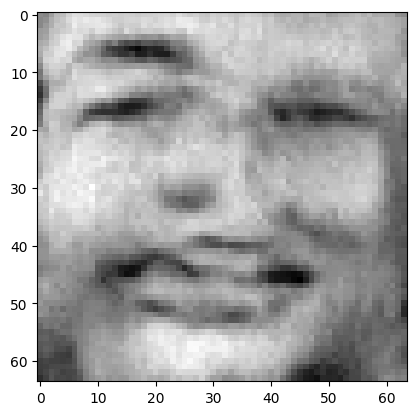

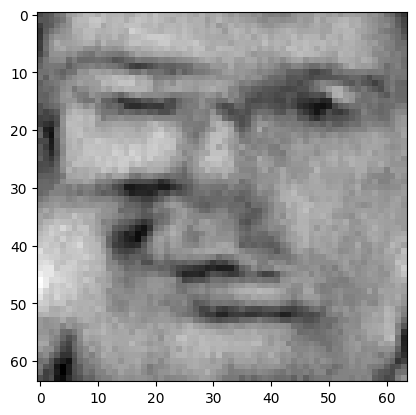

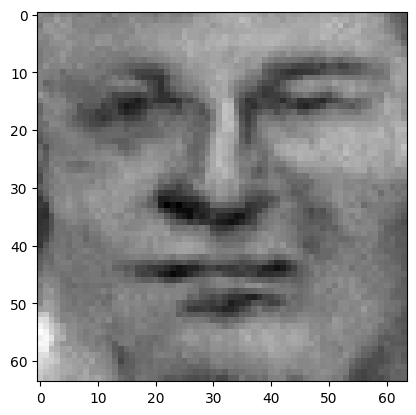

Epoch 162 : 


100%|██████████| 50/50 [00:03<00:00, 13.12it/s]


loss 0.12230571029468598
Epoch 163 : 


100%|██████████| 50/50 [00:03<00:00, 13.19it/s]


loss 0.16481153840144364
Epoch 164 : 


100%|██████████| 50/50 [00:03<00:00, 13.74it/s]


loss 0.14297395103054947
Epoch 165 : 


100%|██████████| 50/50 [00:03<00:00, 12.81it/s]


loss 0.18268845375224935
Epoch 166 : 


100%|██████████| 50/50 [00:03<00:00, 13.60it/s]


loss 0.134111256643367
Epoch 167 : 


100%|██████████| 50/50 [00:03<00:00, 13.31it/s]


loss 0.12749058940768068
Epoch 168 : 


100%|██████████| 50/50 [00:03<00:00, 13.39it/s]


loss 0.1084696687952098
Epoch 169 : 


100%|██████████| 50/50 [00:03<00:00, 13.09it/s]


loss 0.14702656954844884
Epoch 170 : 


100%|██████████| 50/50 [00:03<00:00, 13.67it/s]


loss 0.16442858342467537
Epoch 171 : 


100%|██████████| 50/50 [00:03<00:00, 13.68it/s]


loss 0.15955084505631034
Epoch 172 : 


100%|██████████| 50/50 [00:03<00:00, 13.58it/s]


loss 0.12458533387621223
Epoch 173 : 


100%|██████████| 50/50 [00:03<00:00, 13.30it/s]


loss 0.16436278879217692
Epoch 174 : 


100%|██████████| 50/50 [00:03<00:00, 13.48it/s]


loss 0.12003265196379691
Epoch 175 : 


100%|██████████| 50/50 [00:03<00:00, 13.91it/s]


loss 0.13804804203773796
Epoch 176 : 


100%|██████████| 50/50 [00:03<00:00, 13.76it/s]


loss 0.19307681206768232
Epoch 177 : 


100%|██████████| 50/50 [00:03<00:00, 13.69it/s]


loss 0.13605185137618714
Epoch 178 : 


100%|██████████| 50/50 [00:03<00:00, 13.42it/s]


loss 0.10511484939016345
Epoch 179 : 


100%|██████████| 50/50 [00:03<00:00, 13.17it/s]


loss 0.1308066765645142
Epoch 180 : 


100%|██████████| 50/50 [00:03<00:00, 13.47it/s]


loss 0.15034259921565393
Epoch 181 : 


100%|██████████| 50/50 [00:03<00:00, 13.26it/s]


loss 0.14267043247346917
torch.Size([3, 1, 64, 64])


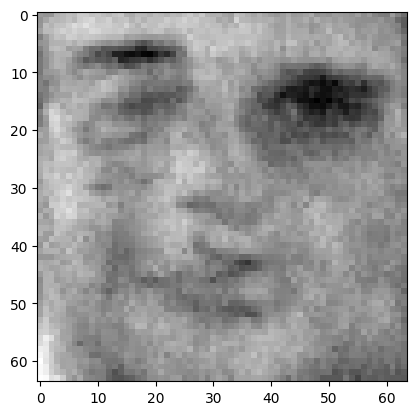

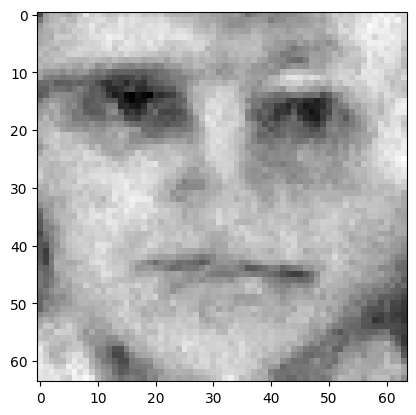

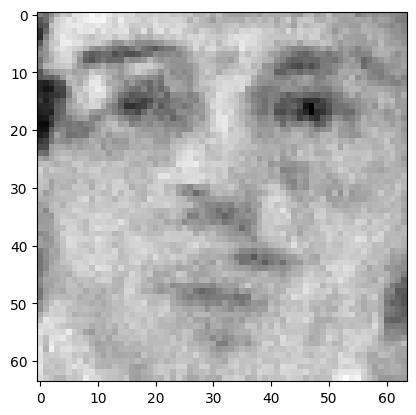

Epoch 182 : 


100%|██████████| 50/50 [00:03<00:00, 13.99it/s]


loss 0.16022252394552966
Epoch 183 : 


100%|██████████| 50/50 [00:03<00:00, 13.31it/s]


loss 0.12542251673279514
Epoch 184 : 


100%|██████████| 50/50 [00:03<00:00, 13.56it/s]


loss 0.14660181925795196
Epoch 185 : 


100%|██████████| 50/50 [00:03<00:00, 13.77it/s]


loss 0.1427770700929313
Epoch 186 : 


100%|██████████| 50/50 [00:03<00:00, 13.55it/s]


loss 0.11975189578971984
Epoch 187 : 


100%|██████████| 50/50 [00:03<00:00, 13.08it/s]


loss 0.1811115904647848
Epoch 188 : 


100%|██████████| 50/50 [00:03<00:00, 13.66it/s]


loss 0.17826332188189645
Epoch 189 : 


100%|██████████| 50/50 [00:03<00:00, 13.34it/s]


loss 0.13093573982074574
Epoch 190 : 


100%|██████████| 50/50 [00:03<00:00, 12.83it/s]


loss 0.13169976339518644
Epoch 191 : 


100%|██████████| 50/50 [00:03<00:00, 13.30it/s]


loss 0.14340449586794954
Epoch 192 : 


100%|██████████| 50/50 [00:03<00:00, 13.19it/s]


loss 0.13026522945446045
Epoch 193 : 


100%|██████████| 50/50 [00:03<00:00, 13.78it/s]


loss 0.13280178715411556
Epoch 194 : 


100%|██████████| 50/50 [00:03<00:00, 13.34it/s]


loss 0.12976757842716427
Epoch 195 : 


100%|██████████| 50/50 [00:03<00:00, 13.69it/s]


loss 0.1561069736556726
Epoch 196 : 


100%|██████████| 50/50 [00:03<00:00, 13.76it/s]


loss 0.1551156042136047
Epoch 197 : 


100%|██████████| 50/50 [00:03<00:00, 13.72it/s]


loss 0.12780102427326237
Epoch 198 : 


100%|██████████| 50/50 [00:03<00:00, 13.45it/s]


loss 0.1266389994684261
Epoch 199 : 


100%|██████████| 50/50 [00:03<00:00, 13.20it/s]


loss 0.16635265865102136


In [11]:
train_ddpm(200, 0.0005, 1, 0.0000)

Epoch 0 : 


100%|██████████| 50/50 [00:03<00:00, 13.63it/s]


loss 0.1208817171250915
Epoch 1 : 


100%|██████████| 50/50 [00:03<00:00, 14.08it/s]


loss 0.14818015751127836
torch.Size([3, 1, 64, 64])


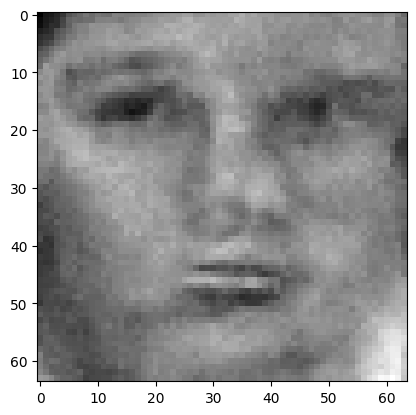

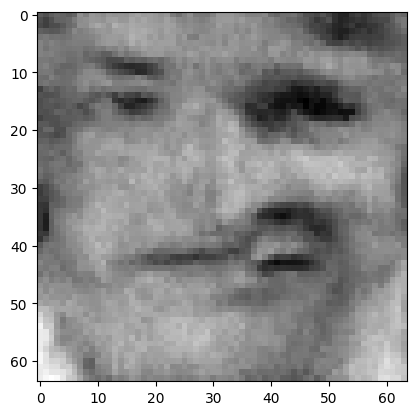

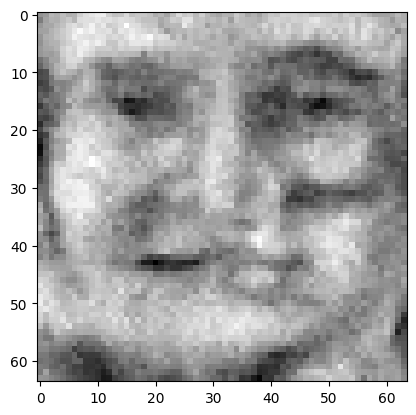

Epoch 2 : 


100%|██████████| 50/50 [00:03<00:00, 12.97it/s]


loss 0.13274633211733297
Epoch 3 : 


100%|██████████| 50/50 [00:03<00:00, 13.52it/s]


loss 0.13737812673331345
Epoch 4 : 


100%|██████████| 50/50 [00:03<00:00, 12.77it/s]


loss 0.1189099542378454
Epoch 5 : 


100%|██████████| 50/50 [00:03<00:00, 13.48it/s]


loss 0.17684422154257995
Epoch 6 : 


100%|██████████| 50/50 [00:03<00:00, 13.30it/s]


loss 0.10365702604215421
Epoch 7 : 


100%|██████████| 50/50 [00:03<00:00, 12.90it/s]


loss 0.1263288367207114
Epoch 8 : 


100%|██████████| 50/50 [00:03<00:00, 13.37it/s]


loss 0.1399248727048837
Epoch 9 : 


100%|██████████| 50/50 [00:03<00:00, 13.65it/s]


loss 0.1737880407114142
Epoch 10 : 


100%|██████████| 50/50 [00:03<00:00, 14.24it/s]


loss 0.0949766935207903
Epoch 11 : 


100%|██████████| 50/50 [00:03<00:00, 13.53it/s]


loss 0.15051843310445054
Epoch 12 : 


100%|██████████| 50/50 [00:03<00:00, 13.30it/s]


loss 0.16378351982077685
Epoch 13 : 


100%|██████████| 50/50 [00:03<00:00, 13.64it/s]


loss 0.14650847508904163
Epoch 14 : 


100%|██████████| 50/50 [00:03<00:00, 13.72it/s]


loss 0.17128557147320517
Epoch 15 : 


100%|██████████| 50/50 [00:03<00:00, 13.86it/s]


loss 0.12641028646819008
Epoch 16 : 


100%|██████████| 50/50 [00:03<00:00, 13.16it/s]


loss 0.1396366496115504
Epoch 17 : 


100%|██████████| 50/50 [00:03<00:00, 13.45it/s]


loss 0.12471132412246183
Epoch 18 : 


100%|██████████| 50/50 [00:03<00:00, 13.33it/s]


loss 0.1272354269278967
Epoch 19 : 


100%|██████████| 50/50 [00:03<00:00, 13.81it/s]


loss 0.13389135619732698
Epoch 20 : 


100%|██████████| 50/50 [00:03<00:00, 13.80it/s]


loss 0.14635547328040518
Epoch 21 : 


100%|██████████| 50/50 [00:03<00:00, 13.47it/s]


loss 0.14145325629409006
torch.Size([3, 1, 64, 64])


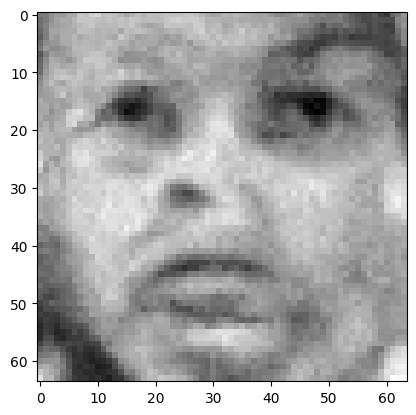

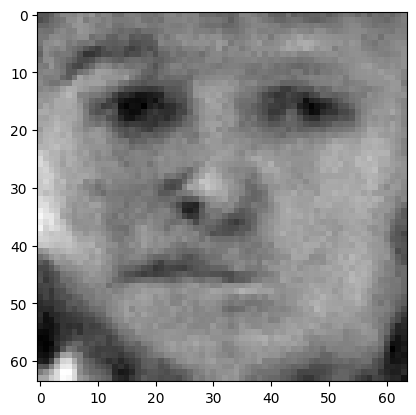

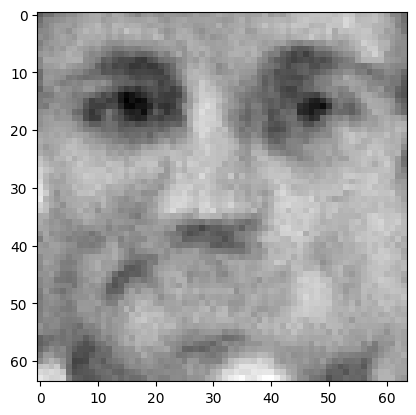

Epoch 22 : 


100%|██████████| 50/50 [00:03<00:00, 13.35it/s]


loss 0.12569232832295343
Epoch 23 : 


100%|██████████| 50/50 [00:03<00:00, 13.58it/s]


loss 0.18440091176946838
Epoch 24 : 


100%|██████████| 50/50 [00:03<00:00, 13.44it/s]


loss 0.1390529164870923
Epoch 25 : 


100%|██████████| 50/50 [00:03<00:00, 13.14it/s]


loss 0.1452369615858755
Epoch 26 : 


100%|██████████| 50/50 [00:03<00:00, 13.98it/s]


loss 0.1424571262459115
Epoch 27 : 


100%|██████████| 50/50 [00:03<00:00, 13.77it/s]


loss 0.12542407800309482
Epoch 28 : 


100%|██████████| 50/50 [00:03<00:00, 12.99it/s]


loss 0.12799156237031156
Epoch 29 : 


100%|██████████| 50/50 [00:03<00:00, 13.39it/s]


loss 0.13945181985718708
Epoch 30 : 


100%|██████████| 50/50 [00:03<00:00, 13.73it/s]


loss 0.13193198315816207
Epoch 31 : 


100%|██████████| 50/50 [00:03<00:00, 14.04it/s]


loss 0.16078877960951218
Epoch 32 : 


100%|██████████| 50/50 [00:03<00:00, 12.74it/s]


loss 0.13383780981798502
Epoch 33 : 


100%|██████████| 50/50 [00:03<00:00, 13.54it/s]


loss 0.13108013029013663
Epoch 34 : 


100%|██████████| 50/50 [00:03<00:00, 13.33it/s]


loss 0.14306562108716264
Epoch 35 : 


100%|██████████| 50/50 [00:03<00:00, 13.58it/s]


loss 0.15826619418190155
Epoch 36 : 


100%|██████████| 50/50 [00:03<00:00, 14.21it/s]


loss 0.14554072442296206
Epoch 37 : 


100%|██████████| 50/50 [00:03<00:00, 13.59it/s]


loss 0.13389835874212103
Epoch 38 : 


100%|██████████| 50/50 [00:03<00:00, 13.39it/s]


loss 0.13366748418050844
Epoch 39 : 


100%|██████████| 50/50 [00:03<00:00, 13.92it/s]


loss 0.15126115047659275
Epoch 40 : 


100%|██████████| 50/50 [00:03<00:00, 13.12it/s]


loss 0.123890943347851
Epoch 41 : 


100%|██████████| 50/50 [00:03<00:00, 13.79it/s]


loss 0.1369067606105089
torch.Size([3, 1, 64, 64])


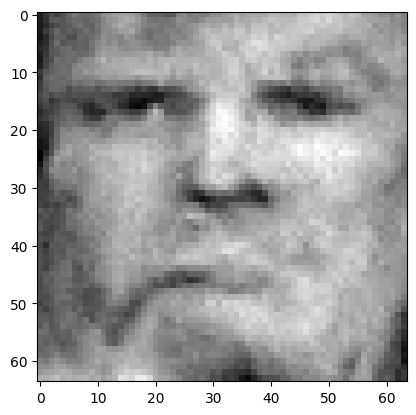

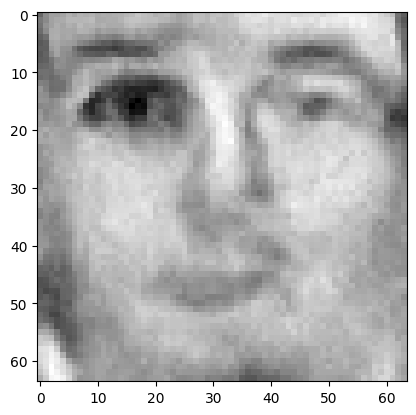

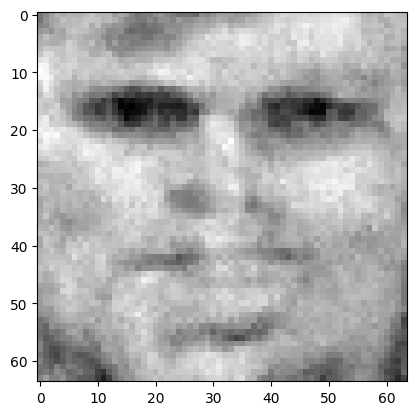

Epoch 42 : 


100%|██████████| 50/50 [00:03<00:00, 13.56it/s]


loss 0.19216028723728676
Epoch 43 : 


100%|██████████| 50/50 [00:03<00:00, 13.29it/s]


loss 0.1573268918470634
Epoch 44 : 


100%|██████████| 50/50 [00:03<00:00, 14.07it/s]


loss 0.1659694215936169
Epoch 45 : 


100%|██████████| 50/50 [00:03<00:00, 13.42it/s]


loss 0.1455338088190639
Epoch 46 : 


100%|██████████| 50/50 [00:03<00:00, 13.43it/s]


loss 0.13783818536451287
Epoch 47 : 


100%|██████████| 50/50 [00:03<00:00, 13.27it/s]


loss 0.17043401884097695
Epoch 48 : 


100%|██████████| 50/50 [00:03<00:00, 13.31it/s]


loss 0.12655728909582786
Epoch 49 : 


100%|██████████| 50/50 [00:03<00:00, 12.89it/s]


loss 0.11992935611361319
Epoch 50 : 


100%|██████████| 50/50 [00:03<00:00, 13.26it/s]


loss 0.12445480976170543
Epoch 51 : 


100%|██████████| 50/50 [00:03<00:00, 13.57it/s]


loss 0.17273092512796362
Epoch 52 : 


100%|██████████| 50/50 [00:03<00:00, 13.49it/s]


loss 0.11471971849981497
Epoch 53 : 


100%|██████████| 50/50 [00:03<00:00, 12.87it/s]


loss 0.10604599727377481
Epoch 54 : 


100%|██████████| 50/50 [00:03<00:00, 13.49it/s]


loss 0.15308774744838166
Epoch 55 : 


100%|██████████| 50/50 [00:03<00:00, 13.85it/s]


loss 0.11499213556250497
Epoch 56 : 


100%|██████████| 50/50 [00:03<00:00, 13.62it/s]


loss 0.15541526383129384
Epoch 57 : 


100%|██████████| 50/50 [00:03<00:00, 13.04it/s]


loss 0.12684072196064738
Epoch 58 : 


100%|██████████| 50/50 [00:03<00:00, 13.37it/s]


loss 0.12891669138406037
Epoch 59 : 


100%|██████████| 50/50 [00:03<00:00, 13.60it/s]


loss 0.12619798399605672
Epoch 60 : 


100%|██████████| 50/50 [00:03<00:00, 13.95it/s]


loss 0.17685824541184023
Epoch 61 : 


100%|██████████| 50/50 [00:03<00:00, 13.89it/s]


loss 0.13201112187297398
torch.Size([3, 1, 64, 64])


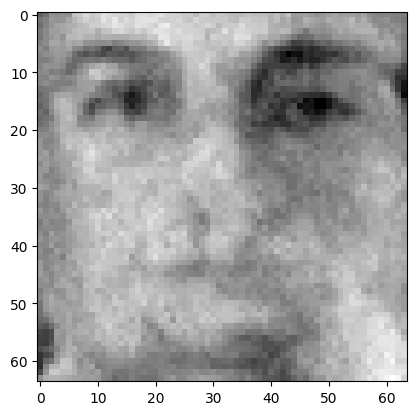

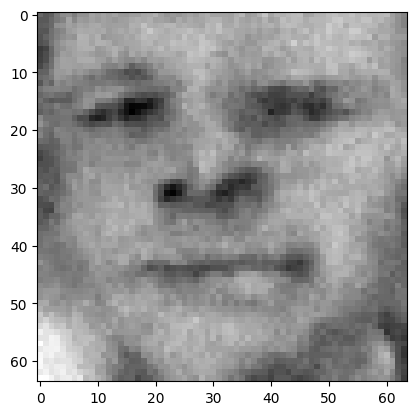

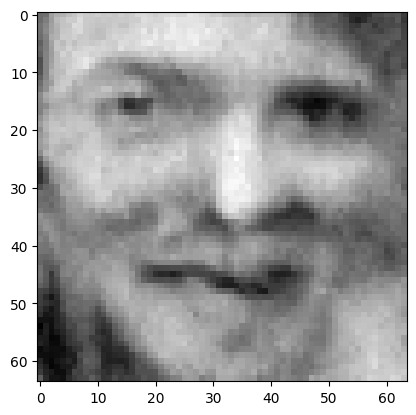

Epoch 62 : 


100%|██████████| 50/50 [00:03<00:00, 13.65it/s]


loss 0.1434572147706007
Epoch 63 : 


100%|██████████| 50/50 [00:03<00:00, 13.51it/s]


loss 0.1407969345712744
Epoch 64 : 


100%|██████████| 50/50 [00:03<00:00, 13.60it/s]


loss 0.14720718572358393
Epoch 65 : 


100%|██████████| 50/50 [00:03<00:00, 13.74it/s]


loss 0.12868167659777502
Epoch 66 : 


100%|██████████| 50/50 [00:03<00:00, 13.05it/s]


loss 0.11885192017770069
Epoch 67 : 


100%|██████████| 50/50 [00:03<00:00, 12.86it/s]


loss 0.10097172416804899
Epoch 68 : 


100%|██████████| 50/50 [00:03<00:00, 13.81it/s]


loss 0.10870615392021732
Epoch 69 : 


100%|██████████| 50/50 [00:03<00:00, 13.38it/s]


loss 0.15923914870948574
Epoch 70 : 


100%|██████████| 50/50 [00:03<00:00, 12.98it/s]


loss 0.17261802341912066
Epoch 71 : 


100%|██████████| 50/50 [00:03<00:00, 13.71it/s]


loss 0.13033998635417696
Epoch 72 : 


100%|██████████| 50/50 [00:03<00:00, 13.22it/s]


loss 0.14852420879979988
Epoch 73 : 


100%|██████████| 50/50 [00:03<00:00, 13.81it/s]


loss 0.15541210437438405
Epoch 74 : 


100%|██████████| 50/50 [00:03<00:00, 13.72it/s]


loss 0.18034523322586474
Epoch 75 : 


100%|██████████| 50/50 [00:03<00:00, 13.72it/s]


loss 0.09998400267607994
Epoch 76 : 


100%|██████████| 50/50 [00:03<00:00, 13.96it/s]


loss 0.12139643685715533
Epoch 77 : 


100%|██████████| 50/50 [00:03<00:00, 13.66it/s]


loss 0.13714804744706305
Epoch 78 : 


100%|██████████| 50/50 [00:03<00:00, 13.50it/s]


loss 0.15739688336692007
Epoch 79 : 


100%|██████████| 50/50 [00:03<00:00, 13.54it/s]


loss 0.13759480216593137
Epoch 80 : 


100%|██████████| 50/50 [00:03<00:00, 13.52it/s]


loss 0.12187654773670105
Epoch 81 : 


100%|██████████| 50/50 [00:03<00:00, 13.83it/s]


loss 0.16309880032984805
torch.Size([3, 1, 64, 64])


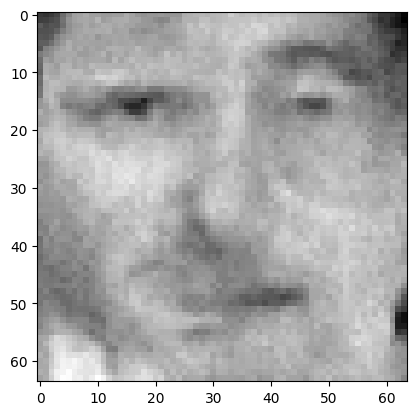

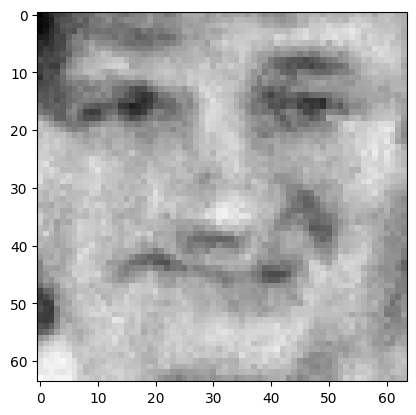

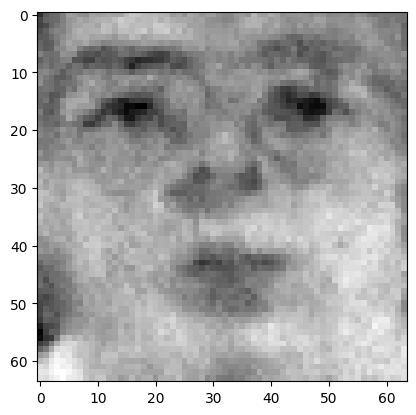

Epoch 82 : 


100%|██████████| 50/50 [00:03<00:00, 13.94it/s]


loss 0.13811019160800134
Epoch 83 : 


100%|██████████| 50/50 [00:03<00:00, 12.93it/s]


loss 0.14082215510441207
Epoch 84 : 


100%|██████████| 50/50 [00:03<00:00, 13.19it/s]


loss 0.12478931055285242
Epoch 85 : 


100%|██████████| 50/50 [00:03<00:00, 13.48it/s]


loss 0.11725541529623307
Epoch 86 : 


100%|██████████| 50/50 [00:03<00:00, 13.97it/s]


loss 0.1121243570717031
Epoch 87 : 


100%|██████████| 50/50 [00:03<00:00, 13.74it/s]


loss 0.10735408653100506
Epoch 88 : 


100%|██████████| 50/50 [00:03<00:00, 13.56it/s]


loss 0.1426100377882655
Epoch 89 : 


100%|██████████| 50/50 [00:03<00:00, 13.26it/s]


loss 0.1368900368305902
Epoch 90 : 


100%|██████████| 50/50 [00:03<00:00, 13.18it/s]


loss 0.13654575311578845
Epoch 91 : 


100%|██████████| 50/50 [00:03<00:00, 13.51it/s]


loss 0.15507980791004006
Epoch 92 : 


100%|██████████| 50/50 [00:03<00:00, 13.83it/s]


loss 0.10553001860039835
Epoch 93 : 


100%|██████████| 50/50 [00:03<00:00, 13.74it/s]


loss 0.12937373664184137
Epoch 94 : 


100%|██████████| 50/50 [00:03<00:00, 13.54it/s]


loss 0.13527425739591104
Epoch 95 : 


100%|██████████| 50/50 [00:03<00:00, 13.70it/s]


loss 0.12802610407937515
Epoch 96 : 


100%|██████████| 50/50 [00:03<00:00, 13.45it/s]


loss 0.12621157328541857
Epoch 97 : 


100%|██████████| 50/50 [00:03<00:00, 14.17it/s]


loss 0.1736181145440764
Epoch 98 : 


100%|██████████| 50/50 [00:03<00:00, 13.54it/s]


loss 0.1391136552950567
Epoch 99 : 


100%|██████████| 50/50 [00:03<00:00, 13.57it/s]


loss 0.1201220270582509
Epoch 100 : 


100%|██████████| 50/50 [00:03<00:00, 13.52it/s]


loss 0.17161946422448848
Epoch 101 : 


100%|██████████| 50/50 [00:03<00:00, 13.47it/s]


loss 0.10278506676711126
torch.Size([3, 1, 64, 64])


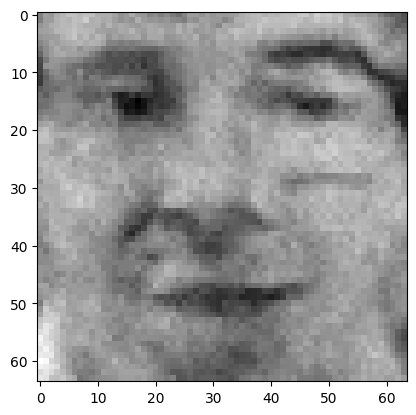

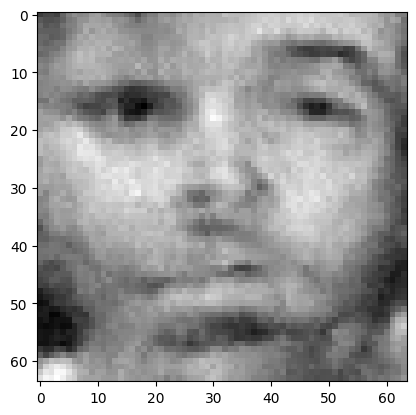

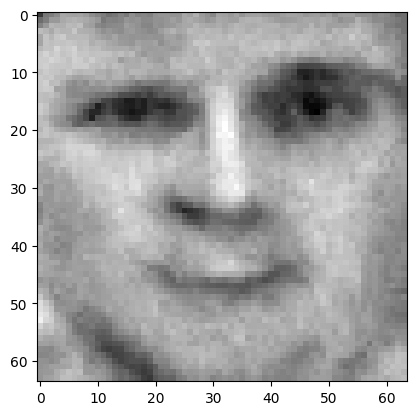

Epoch 102 : 


100%|██████████| 50/50 [00:03<00:00, 13.56it/s]


loss 0.1293903401588956
Epoch 103 : 


100%|██████████| 50/50 [00:03<00:00, 13.40it/s]


loss 0.16712030026114374
Epoch 104 : 


100%|██████████| 50/50 [00:03<00:00, 12.78it/s]


loss 0.15004530578822683
Epoch 105 : 


100%|██████████| 50/50 [00:03<00:00, 13.73it/s]


loss 0.16920255343683469
Epoch 106 : 


100%|██████████| 50/50 [00:03<00:00, 13.18it/s]


loss 0.1671179201737573
Epoch 107 : 


100%|██████████| 50/50 [00:03<00:00, 13.43it/s]


loss 0.17096432045018128
Epoch 108 : 


100%|██████████| 50/50 [00:03<00:00, 13.61it/s]


loss 0.1157819245962902
Epoch 109 : 


100%|██████████| 50/50 [00:03<00:00, 13.43it/s]


loss 0.14978945913424202
Epoch 110 : 


100%|██████████| 50/50 [00:03<00:00, 13.47it/s]


loss 0.14779145235521493
Epoch 111 : 


100%|██████████| 50/50 [00:03<00:00, 13.25it/s]


loss 0.1288443972549448
Epoch 112 : 


100%|██████████| 50/50 [00:03<00:00, 14.57it/s]


loss 0.15786438201922548
Epoch 113 : 


100%|██████████| 50/50 [00:03<00:00, 12.89it/s]


loss 0.10445394432864163
Epoch 114 : 


100%|██████████| 50/50 [00:03<00:00, 12.88it/s]


loss 0.1754701703817989
Epoch 115 : 


100%|██████████| 50/50 [00:03<00:00, 14.11it/s]


loss 0.14453660029675736
Epoch 116 : 


100%|██████████| 50/50 [00:03<00:00, 13.58it/s]


loss 0.1232768478735894
Epoch 117 : 


100%|██████████| 50/50 [00:03<00:00, 13.68it/s]


loss 0.10000534924561791
Epoch 118 : 


100%|██████████| 50/50 [00:03<00:00, 14.10it/s]


loss 0.15072395863527466
Epoch 119 : 


100%|██████████| 50/50 [00:03<00:00, 13.45it/s]


loss 0.19740951669625104
Epoch 120 : 


100%|██████████| 50/50 [00:03<00:00, 14.22it/s]


loss 0.1384524365216091
Epoch 121 : 


100%|██████████| 50/50 [00:03<00:00, 13.75it/s]


loss 0.1260193261291398
torch.Size([3, 1, 64, 64])


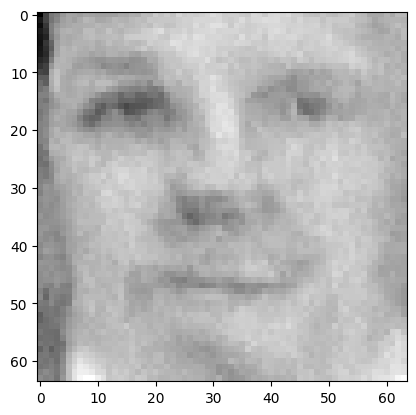

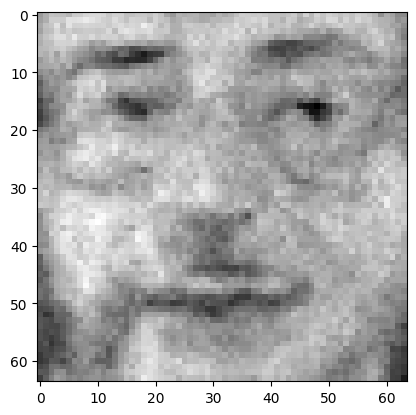

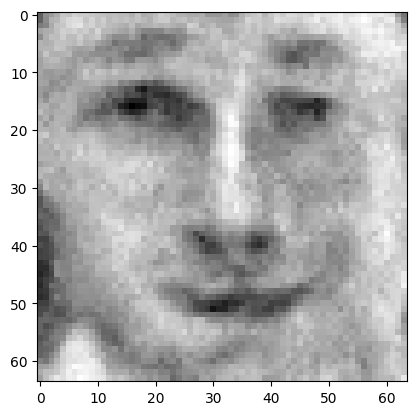

Epoch 122 : 


100%|██████████| 50/50 [00:03<00:00, 14.06it/s]


loss 0.12484580526338884
Epoch 123 : 


100%|██████████| 50/50 [00:03<00:00, 13.68it/s]


loss 0.14499204370683974
Epoch 124 : 


100%|██████████| 50/50 [00:03<00:00, 13.27it/s]


loss 0.1655327645708793
Epoch 125 : 


100%|██████████| 50/50 [00:03<00:00, 13.57it/s]


loss 0.15116054856009353
Epoch 126 : 


100%|██████████| 50/50 [00:03<00:00, 13.47it/s]


loss 0.13513948695711636
Epoch 127 : 


100%|██████████| 50/50 [00:03<00:00, 13.94it/s]


loss 0.13656447995930912
Epoch 128 : 


100%|██████████| 50/50 [00:03<00:00, 13.57it/s]


loss 0.12907027865062276
Epoch 129 : 


100%|██████████| 50/50 [00:03<00:00, 13.83it/s]


loss 0.13157556873106552
Epoch 130 : 


100%|██████████| 50/50 [00:03<00:00, 13.32it/s]


loss 0.1630716393623676
Epoch 131 : 


100%|██████████| 50/50 [00:03<00:00, 13.55it/s]


loss 0.12023149617726768
Epoch 132 : 


100%|██████████| 50/50 [00:03<00:00, 13.18it/s]


loss 0.17822978990942873
Epoch 133 : 


100%|██████████| 50/50 [00:03<00:00, 13.74it/s]


loss 0.12130114927062698
Epoch 134 : 


100%|██████████| 50/50 [00:03<00:00, 12.78it/s]


loss 0.12264309033045764
Epoch 135 : 


100%|██████████| 50/50 [00:03<00:00, 13.83it/s]


loss 0.10233438743900786
Epoch 136 : 


100%|██████████| 50/50 [00:03<00:00, 14.20it/s]


loss 0.1454872144442289
Epoch 137 : 


100%|██████████| 50/50 [00:03<00:00, 13.35it/s]


loss 0.12464144365580267
Epoch 138 : 


100%|██████████| 50/50 [00:03<00:00, 13.99it/s]


loss 0.13840519082650857
Epoch 139 : 


100%|██████████| 50/50 [00:03<00:00, 13.21it/s]


loss 0.1318657520082521
Epoch 140 : 


100%|██████████| 50/50 [00:03<00:00, 13.50it/s]


loss 0.1449541190067416
Epoch 141 : 


100%|██████████| 50/50 [00:03<00:00, 13.48it/s]


loss 0.13585172512657312
torch.Size([3, 1, 64, 64])


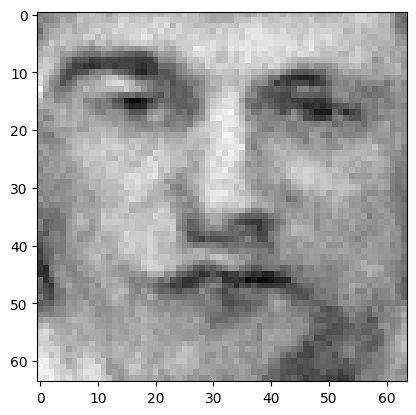

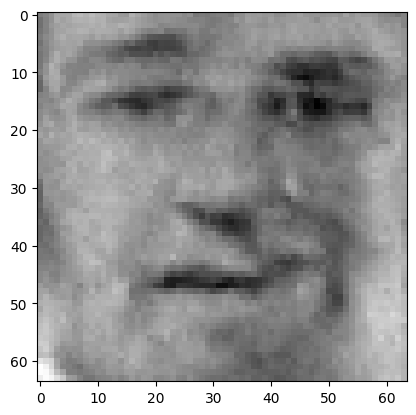

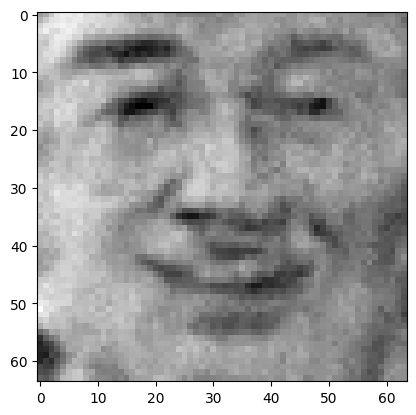

Epoch 142 : 


100%|██████████| 50/50 [00:03<00:00, 14.31it/s]


loss 0.11802714264797715
Epoch 143 : 


100%|██████████| 50/50 [00:03<00:00, 13.51it/s]


loss 0.11512322792531376
Epoch 144 : 


100%|██████████| 50/50 [00:03<00:00, 13.54it/s]


loss 0.11846558450330613
Epoch 145 : 


100%|██████████| 50/50 [00:03<00:00, 13.56it/s]


loss 0.12361299975495661
Epoch 146 : 


100%|██████████| 50/50 [00:03<00:00, 13.37it/s]


loss 0.1692286781869781
Epoch 147 : 


100%|██████████| 50/50 [00:03<00:00, 14.04it/s]


loss 0.10517722986125858
Epoch 148 : 


100%|██████████| 50/50 [00:03<00:00, 13.03it/s]


loss 0.13594357691285935
Epoch 149 : 


100%|██████████| 50/50 [00:03<00:00, 12.84it/s]


loss 0.16372731080627348
Epoch 150 : 


100%|██████████| 50/50 [00:03<00:00, 13.64it/s]


loss 0.12887260949790788
Epoch 151 : 


100%|██████████| 50/50 [00:03<00:00, 13.99it/s]


loss 0.12861182526006407
Epoch 152 : 


100%|██████████| 50/50 [00:03<00:00, 13.40it/s]


loss 0.12479281804436101
Epoch 153 : 


100%|██████████| 50/50 [00:03<00:00, 13.60it/s]


loss 0.1196881691524133
Epoch 154 : 


100%|██████████| 50/50 [00:03<00:00, 13.79it/s]


loss 0.11739763414726492
Epoch 155 : 


100%|██████████| 50/50 [00:03<00:00, 13.84it/s]


loss 0.1584464441606075
Epoch 156 : 


100%|██████████| 50/50 [00:03<00:00, 13.17it/s]


loss 0.15265425023485782
Epoch 157 : 


100%|██████████| 50/50 [00:03<00:00, 13.43it/s]


loss 0.16086961822825735
Epoch 158 : 


100%|██████████| 50/50 [00:03<00:00, 13.47it/s]


loss 0.1345774657884207
Epoch 159 : 


100%|██████████| 50/50 [00:03<00:00, 13.60it/s]


loss 0.1564116790778661
Epoch 160 : 


100%|██████████| 50/50 [00:03<00:00, 13.63it/s]


loss 0.13139272340215816
Epoch 161 : 


100%|██████████| 50/50 [00:03<00:00, 13.42it/s]


loss 0.14106584068672887
torch.Size([3, 1, 64, 64])


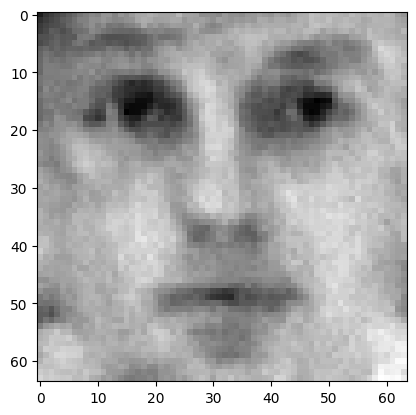

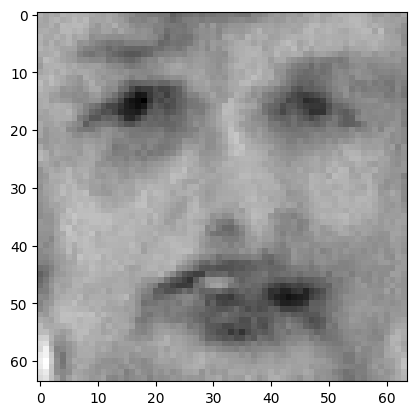

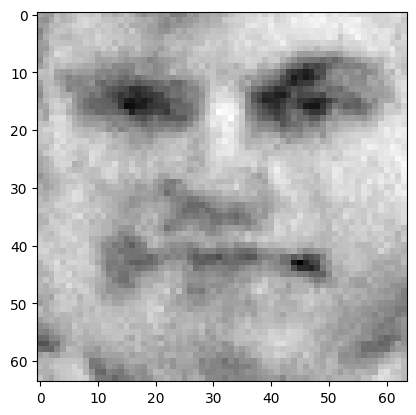

Epoch 162 : 


100%|██████████| 50/50 [00:03<00:00, 14.18it/s]


loss 0.12209373876550347
Epoch 163 : 


100%|██████████| 50/50 [00:03<00:00, 13.67it/s]


loss 0.1279673334587744
Epoch 164 : 


100%|██████████| 50/50 [00:03<00:00, 13.42it/s]


loss 0.12635845277527707
Epoch 165 : 


100%|██████████| 50/50 [00:03<00:00, 12.94it/s]


loss 0.14239669045977327
Epoch 166 : 


100%|██████████| 50/50 [00:03<00:00, 13.41it/s]


loss 0.13858508204017603
Epoch 167 : 


100%|██████████| 50/50 [00:03<00:00, 13.73it/s]


loss 0.14568041718407754
Epoch 168 : 


100%|██████████| 50/50 [00:03<00:00, 13.82it/s]


loss 0.11438897554030539
Epoch 169 : 


100%|██████████| 50/50 [00:03<00:00, 13.93it/s]


loss 0.13703696236217291
Epoch 170 : 


100%|██████████| 50/50 [00:03<00:00, 13.58it/s]


loss 0.13983425111546133
Epoch 171 : 


100%|██████████| 50/50 [00:03<00:00, 13.46it/s]


loss 0.13960508548967512
Epoch 172 : 


100%|██████████| 50/50 [00:03<00:00, 13.71it/s]


loss 0.1493533818908346
Epoch 173 : 


100%|██████████| 50/50 [00:03<00:00, 13.55it/s]


loss 0.11739415771035681
Epoch 174 : 


100%|██████████| 50/50 [00:03<00:00, 13.32it/s]


loss 0.12762526962832701
Epoch 175 : 


100%|██████████| 50/50 [00:03<00:00, 12.90it/s]


loss 0.1298870383602683
Epoch 176 : 


100%|██████████| 50/50 [00:03<00:00, 13.64it/s]


loss 0.12597593663594603
Epoch 177 : 


100%|██████████| 50/50 [00:03<00:00, 13.31it/s]


loss 0.1681257682595041
Epoch 178 : 


100%|██████████| 50/50 [00:03<00:00, 13.80it/s]


loss 0.14419937367846777
Epoch 179 : 


100%|██████████| 50/50 [00:03<00:00, 13.40it/s]


loss 0.14439264678156136
Epoch 180 : 


100%|██████████| 50/50 [00:03<00:00, 13.50it/s]


loss 0.13530268874249785
Epoch 181 : 


100%|██████████| 50/50 [00:03<00:00, 13.38it/s]


loss 0.15551837597207852
torch.Size([3, 1, 64, 64])


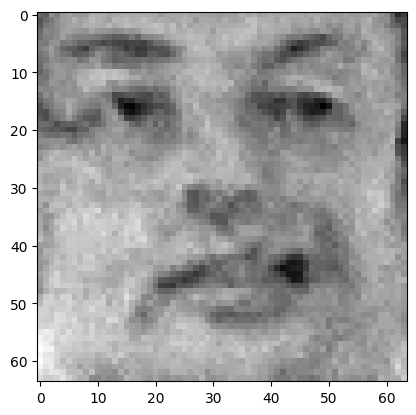

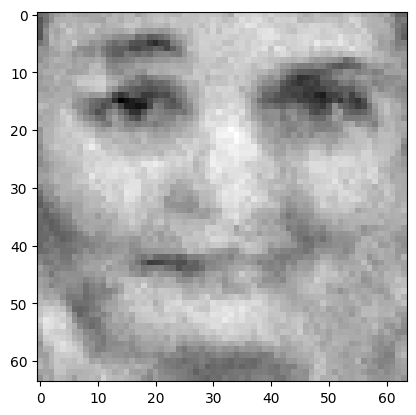

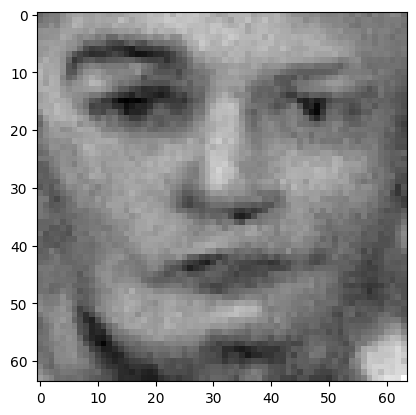

Epoch 182 : 


100%|██████████| 50/50 [00:03<00:00, 12.59it/s]


loss 0.12417025818892748
Epoch 183 : 


100%|██████████| 50/50 [00:03<00:00, 13.49it/s]


loss 0.13202687930774126
Epoch 184 : 


100%|██████████| 50/50 [00:03<00:00, 13.05it/s]


loss 0.1490436042173959
Epoch 185 : 


100%|██████████| 50/50 [00:03<00:00, 13.81it/s]


loss 0.1613913821179224
Epoch 186 : 


100%|██████████| 50/50 [00:03<00:00, 13.50it/s]


loss 0.09128415838041302
Epoch 187 : 


100%|██████████| 50/50 [00:03<00:00, 13.94it/s]


loss 0.11112493013004367
Epoch 188 : 


100%|██████████| 50/50 [00:03<00:00, 13.13it/s]


loss 0.1472340850438668
Epoch 189 : 


100%|██████████| 50/50 [00:03<00:00, 12.92it/s]


loss 0.16009983457330304
Epoch 190 : 


100%|██████████| 50/50 [00:03<00:00, 13.58it/s]


loss 0.12025277000764382
Epoch 191 : 


100%|██████████| 50/50 [00:03<00:00, 13.62it/s]


loss 0.1601741015207533
Epoch 192 : 


100%|██████████| 50/50 [00:03<00:00, 13.40it/s]


loss 0.14491608379243784
Epoch 193 : 


100%|██████████| 50/50 [00:03<00:00, 13.85it/s]


loss 0.1259617257016391
Epoch 194 : 


100%|██████████| 50/50 [00:03<00:00, 13.71it/s]


loss 0.11273618927565657
Epoch 195 : 


100%|██████████| 50/50 [00:03<00:00, 13.38it/s]


loss 0.1644299452857576
Epoch 196 : 


100%|██████████| 50/50 [00:03<00:00, 13.65it/s]


loss 0.12989481137604103
Epoch 197 : 


100%|██████████| 50/50 [00:03<00:00, 13.44it/s]


loss 0.1393680926543299
Epoch 198 : 


100%|██████████| 50/50 [00:03<00:00, 13.89it/s]


loss 0.11008238356686316
Epoch 199 : 


100%|██████████| 50/50 [00:03<00:00, 13.58it/s]


loss 0.13272125436080456


In [12]:
train_ddpm(200, 0.0005, 0.99, 0.0000)